In [ ]:
import os
os.chdir('/content/drive/MyDrive/zerobase/FinalPJ')
os.getcwd()

'/content/drive/MyDrive/zerobase/FinalPJ'

In [ ]:
import pandas as pd
df = pd.read_csv('BankChurners_.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [ ]:
df.shape

(10127, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df['Attrition_Flag_Binary'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)
df[['Attrition_Flag','Attrition_Flag_Binary']].drop_duplicates()

Attrition_Flag  Attrition_Flag_Binary
0   Existing Customer                      0
21  Attrited Customer                      1

#Trial 1: Include all variables

###Classify columns

🔽 numeric

In [ ]:
import numpy as np

In [ ]:
cols_num = df.select_dtypes(include=np.number).columns.tolist()
cols_num

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Attrition_Flag_Binary']

In [ ]:
# Remove 'Client Number' and 'Attrition_Flag_Binary'(target value)
cols_num.remove('CLIENTNUM')
cols_num.remove('Attrition_Flag_Binary')
cols_num

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

🔽 categorical

In [ ]:
cols_ctgr = df.select_dtypes('object').columns.tolist()
cols_ctgr

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
# Remove 'Attrition_Flag' (target value)
cols_ctgr.remove('Attrition_Flag')
cols_ctgr

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
cols_ctgr_ord = ['Education_Level', 'Income_Category', 'Card_Category']
cols_ctgr_ord

['Education_Level', 'Income_Category', 'Card_Category']

In [ ]:
cols_ctgr_ctgr = cols_ctgr
for col in cols_ctgr_ord:
    cols_ctgr_ctgr.remove(col)
cols_ctgr_ctgr

['Gender', 'Marital_Status']

- cols_num
- cols_ctgr_ctgr
- cols_ctgr_ord

In [ ]:
education_order = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
income_order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
card_order = ['Unknown', 'Blue', 'Silver', 'Gold', 'Platinum']
# Although the 'card' column does not contain 'Unknown' values,
# 'Unknown' is deliberately added to card_order to ensure that the meaningful values start at index 1 for consistency.

###Correlation Analysis

Numeric Variables vs Attrition Flag (Correlation & P-Value)

In [ ]:
from scipy.stats import pointbiserialr, chi2_contingency

In [ ]:
# Dictionary to hold correlations and p-values
correlations = {}

# Calculate point-biserial correlation for each numeric column
for col in cols_num:
    corr, p_value = pointbiserialr(df['Attrition_Flag_Binary'], df[col])
    correlations[col] = {'Correlation': corr, 'P-Value': p_value}

# Create a DataFrame from the correlations dictionary
correlation_data = {
    'Column': [],
    'Correlation': [],
    'P-Value': [],
    'P-Value < 0.05': [],
}

for k, v in correlations.items():
    correlation_data['Column'].append(k)
    correlation_data['Correlation'].append(v['Correlation'])
    correlation_data['P-Value'].append(v['P-Value'])
    correlation_data['P-Value < 0.05'].append('Yes' if v['P-Value']<0.05 else 'No')

correlation_df = pd.DataFrame(correlation_data)

# Sort the DataFrame by the absolute value of the correlation coefficient, descending
correlation_df = correlation_df.sort_values(by='P-Value', ascending=True)

# Reset index after sorting
correlation_df = correlation_df.reset_index(drop=True)

# Display the DataFrame
# pd.set_option('display.float_format', lambda x: '%.20f' % x)
pd.reset_option('display.float_format')
correlation_df

Column  Correlation        P-Value P-Value < 0.05
0             Total_Trans_Ct    -0.371403   0.000000e+00            Yes
1        Total_Ct_Chng_Q4_Q1    -0.290054  1.647725e-195            Yes
2        Total_Revolving_Bal    -0.263053  6.630148e-160            Yes
3      Contacts_Count_12_mon     0.204491   4.697490e-96            Yes
4      Avg_Utilization_Ratio    -0.178410   3.357689e-73            Yes
5            Total_Trans_Amt    -0.168598   1.857439e-65            Yes
6     Months_Inactive_12_mon     0.152449   1.032664e-53            Yes
7   Total_Relationship_Count    -0.150005   4.829281e-52            Yes
8       Total_Amt_Chng_Q4_Q1    -0.131063   4.836643e-40            Yes
9               Credit_Limit    -0.023873   1.628536e-02            Yes
10           Dependent_count     0.018991   5.600239e-02             No
11              Customer_Age     0.018203   6.698689e-02             No
12            Months_on_book     0.013687   1.684370e-01             No
13           Avg_Open_To_Buy    -0.000285   9.771161e-01             No

Correlation Matrix of Numerical Variables

In [ ]:
df_num = df[cols_num]
corr_matrix = df_num.corr()
corr_matrix

Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  1.000000        -0.122254        0.788912   
Dependent_count              -0.122254         1.000000       -0.103062   
Months_on_book                0.788912        -0.103062        1.000000   
Total_Relationship_Count     -0.010931        -0.039076       -0.009203   
Months_Inactive_12_mon        0.054361        -0.010768        0.074164   
Contacts_Count_12_mon        -0.018452        -0.040505       -0.010774   
Credit_Limit                  0.002476         0.068065        0.007507   
Total_Revolving_Bal           0.014780        -0.002688        0.008623   
Avg_Open_To_Buy               0.001151         0.068291        0.006732   
Total_Amt_Chng_Q4_Q1         -0.062042        -0.035439       -0.048959   
Total_Trans_Amt              -0.046446         0.025046       -0.038591   
Total_Trans_Ct               -0.067097         0.049912       -0.049819   
Total_Ct_Chng_Q4_Q1          -0.012143         0.011087       -0.014072   
Avg_Utilization_Ratio         0.007114        -0.037135       -0.007541   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
Customer_Age                             -0.010931                0.054361   
Dependent_count                          -0.039076               -0.010768   
Months_on_book                           -0.009203                0.074164   
Total_Relationship_Count                  1.000000               -0.003675   
Months_Inactive_12_mon                   -0.003675                1.000000   
Contacts_Count_12_mon                     0.055203                0.029493   
Credit_Limit                             -0.071386               -0.020394   
Total_Revolving_Bal                       0.013726               -0.042210   
Avg_Open_To_Buy                          -0.072601               -0.016605   
Total_Amt_Chng_Q4_Q1                      0.050119               -0.032247   
Total_Trans_Amt                          -0.347229               -0.036982   
Total_Trans_Ct                           -0.241891               -0.042787   
Total_Ct_Chng_Q4_Q1                       0.040831               -0.038989   
Avg_Utilization_Ratio                     0.067663               -0.007503   

                          Contacts_Count_12_mon  Credit_Limit  \
Customer_Age                          -0.018452      0.002476   
Dependent_count                       -0.040505      0.068065   
Months_on_book                        -0.010774      0.007507   
Total_Relationship_Count               0.055203     -0.071386   
Months_Inactive_12_mon                 0.029493     -0.020394   
Contacts_Count_12_mon                  1.000000      0.020817   
Credit_Limit                           0.020817      1.000000   
Total_Revolving_Bal                   -0.053913      0.042493   
Avg_Open_To_Buy                        0.025646      0.995981   
Total_Amt_Chng_Q4_Q1                  -0.024445      0.012813   
Total_Trans_Amt                       -0.112774      0.171730   
Total_Trans_Ct                        -0.152213      0.075927   
Total_Ct_Chng_Q4_Q1                   -0.094997     -0.002020   
Avg_Utilization_Ratio                 -0.055471     -0.482965   

                          Total_Revolving_Bal  Avg_Open_To_Buy  \
Customer_Age                         0.014780         0.001151   
Dependent_count                     -0.002688         0.068291   
Months_on_book                       0.008623         0.006732   
Total_Relationship_Count             0.013726        -0.072601   
Months_Inactive_12_mon              -0.042210        -0.016605   
Contacts_Count_12_mon               -0.053913         0.025646   
Credit_Limit                         0.042493         0.995981   
Total_Revolving_Bal                  1.000000        -0.047167   
Avg_Open_To_Buy                     -0.047167         1.000000   
Total_Amt_Chng_Q4_Q1                 0.058174         0.007595   
Total_Trans_Amt            

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

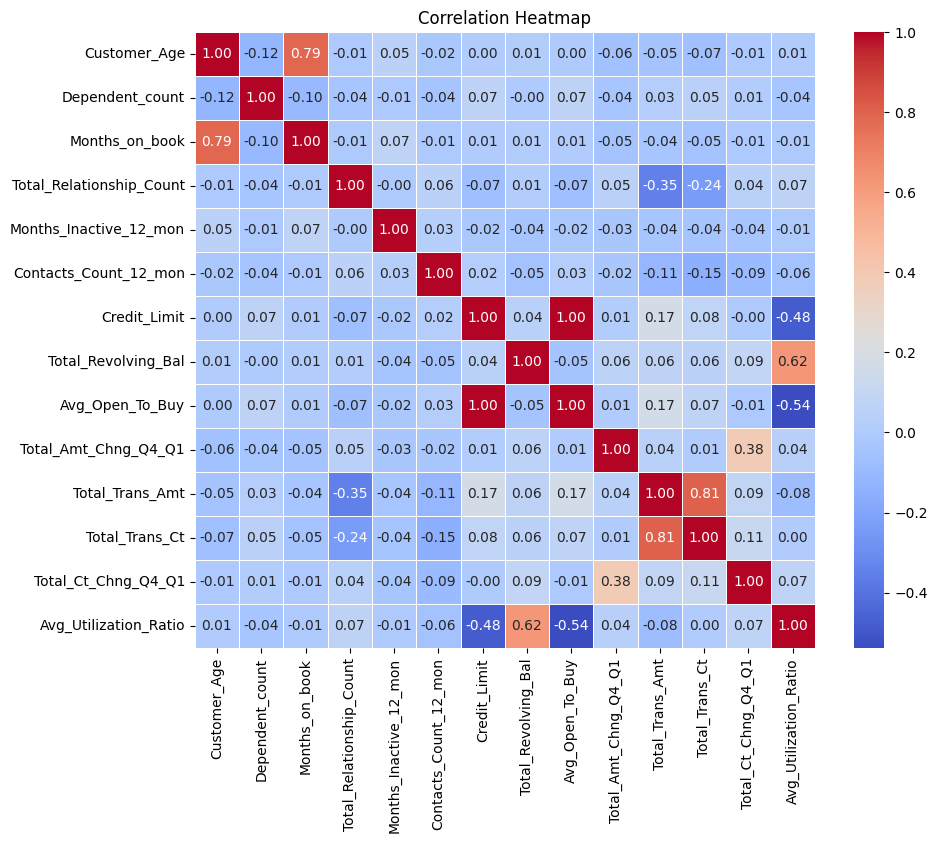

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df[['Credit_Limit', 'Avg_Open_To_Buy']]

Credit_Limit  Avg_Open_To_Buy
0           12691.0          11914.0
1            8256.0           7392.0
2            3418.0           3418.0
3            3313.0            796.0
4            4716.0           4716.0
...             ...              ...
10122        4003.0           2152.0
10123        4277.0           2091.0
10124        5409.0           5409.0
10125        5281.0           5281.0
10126       10388.0           8427.0

[10127 rows x 2 columns]

- There is a very strong positive correlation (r > 0.99) between Credit_Limit and Avg_Open_To_Buy

Logistic Regression: Attrition Probability by variables

In [ ]:
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


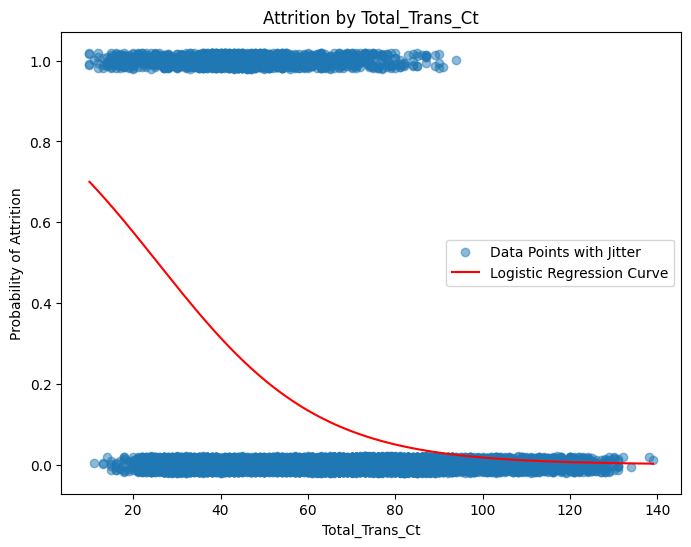

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


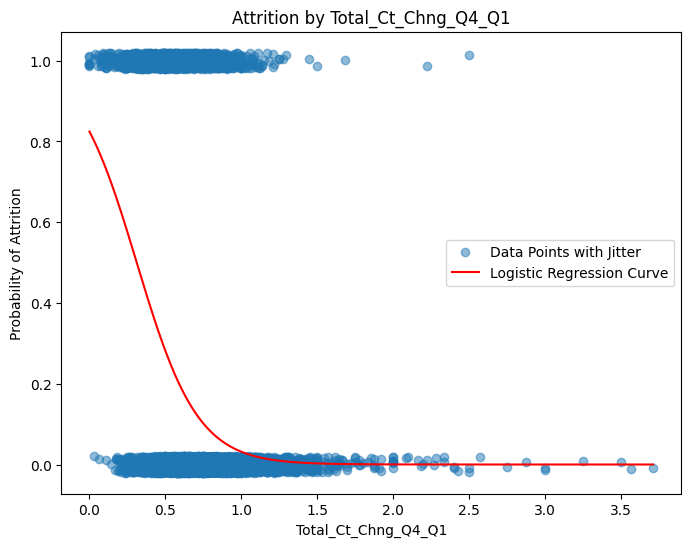

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


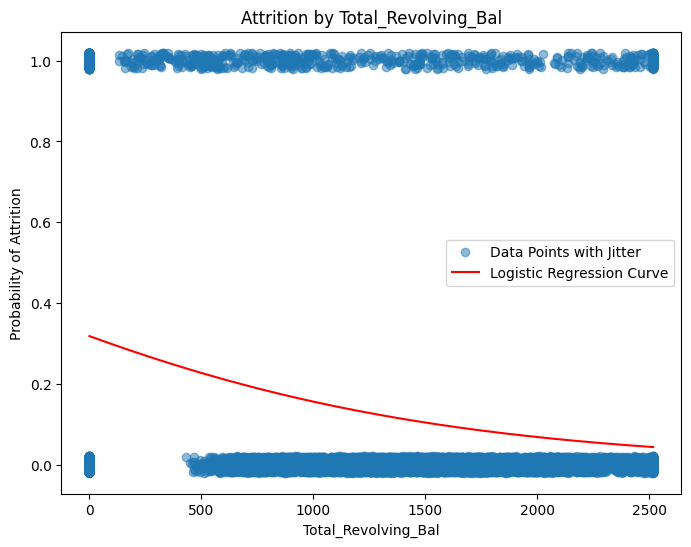

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


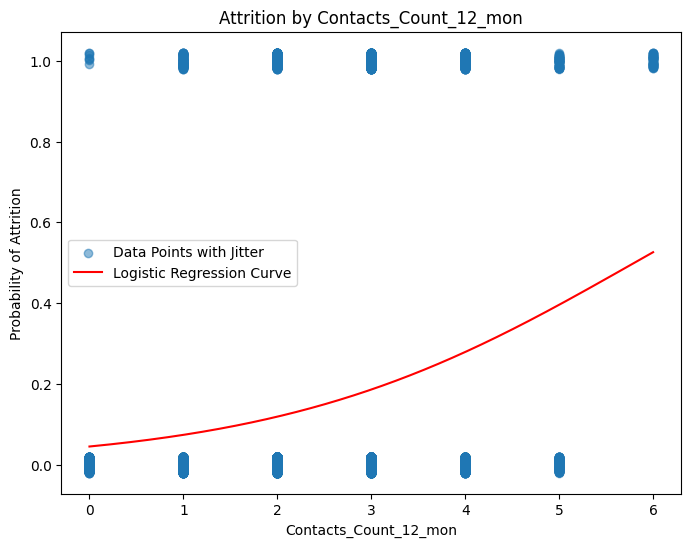

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


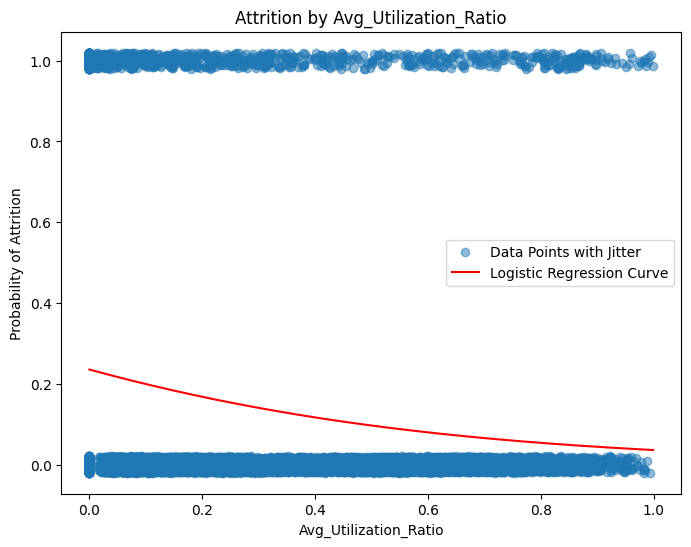

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


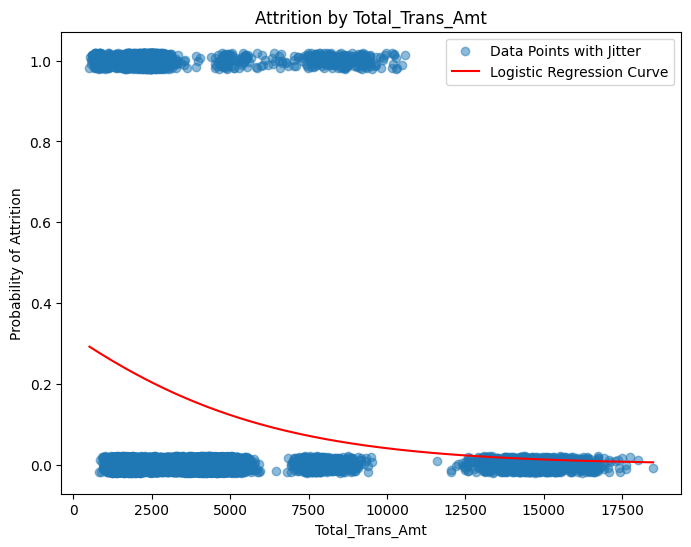

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


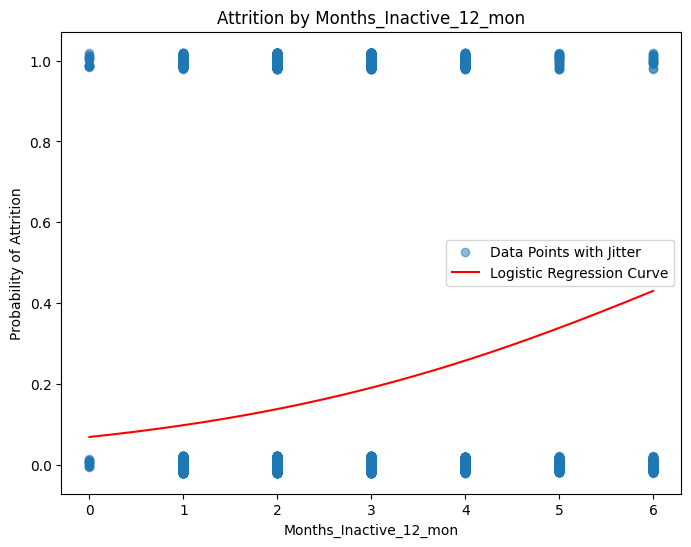

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


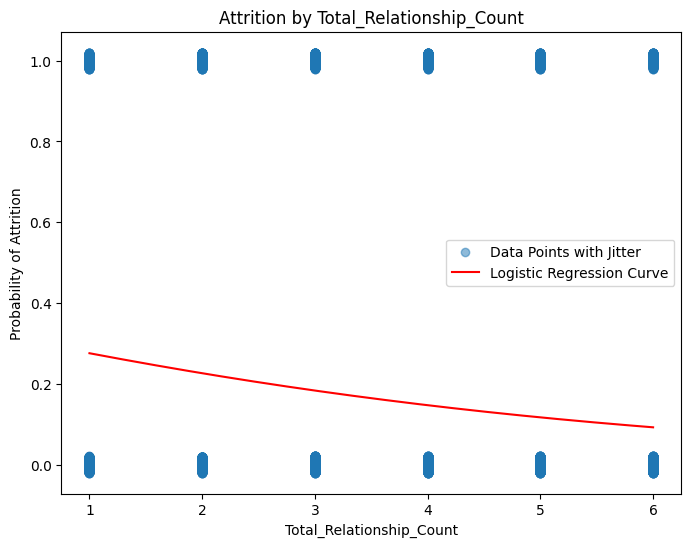

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


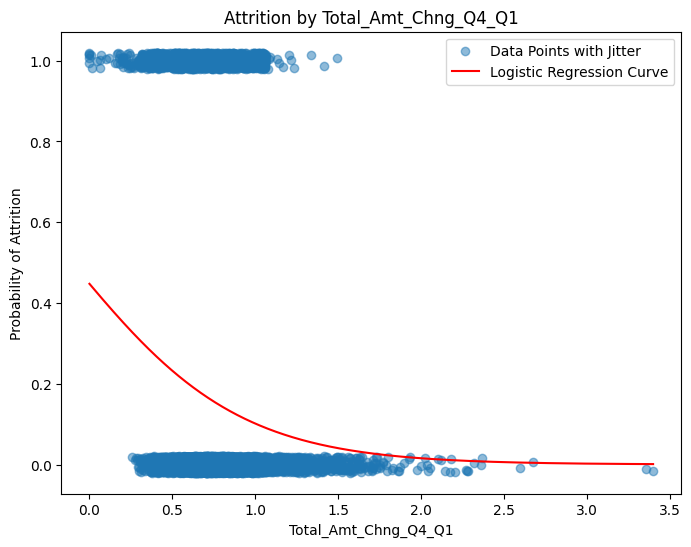

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


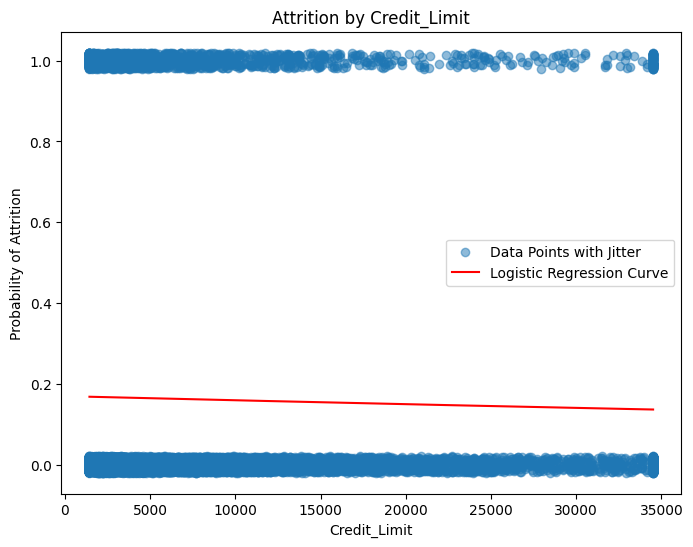

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


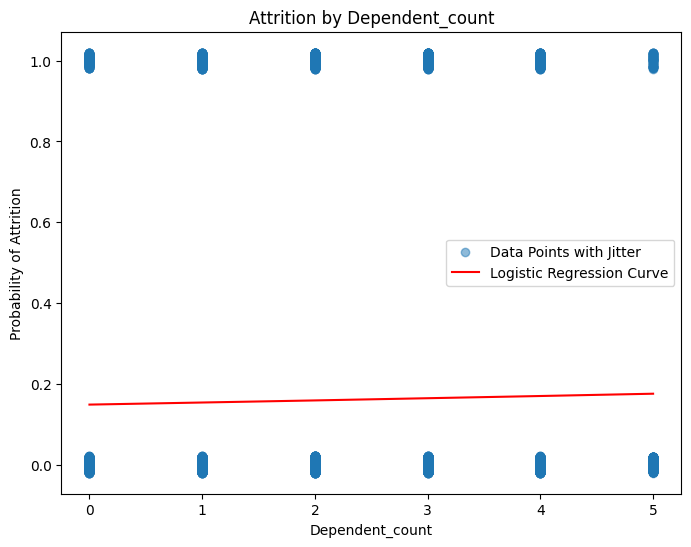

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


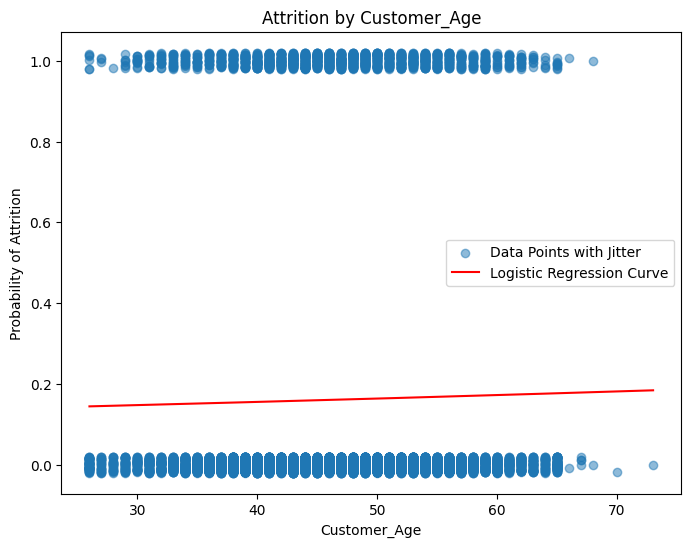

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


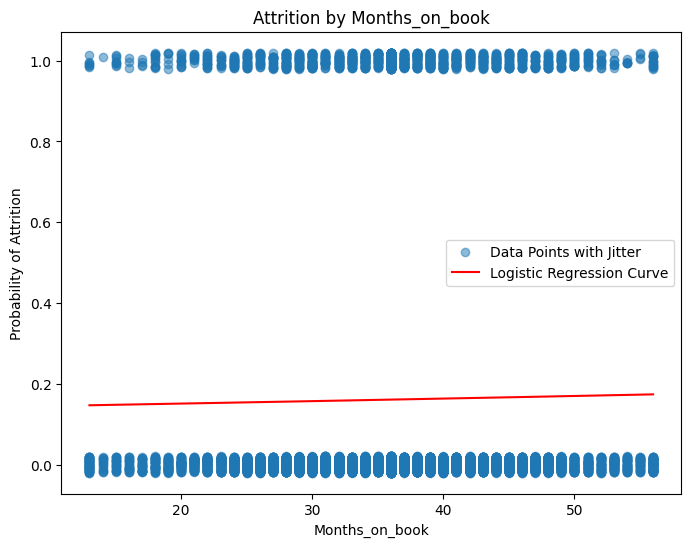

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


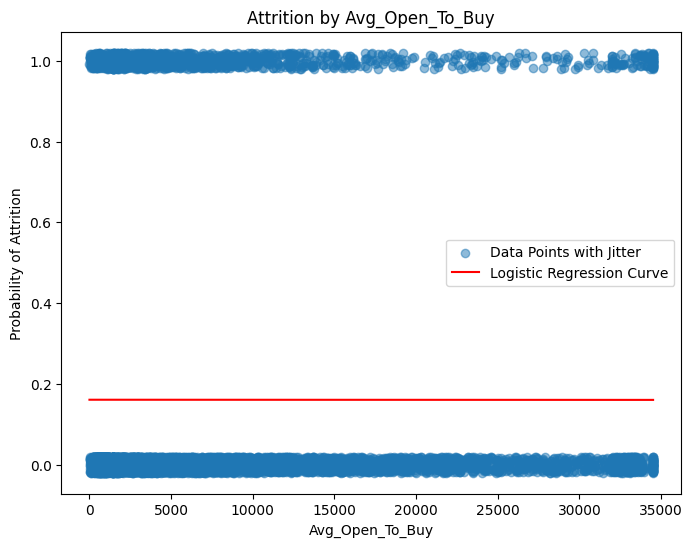

In [ ]:
cols_num_pvalue_asc=['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Months_Inactive_12_mon', 'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1', 'Credit_Limit', 'Dependent_count', 'Customer_Age', 'Months_on_book', 'Avg_Open_To_Buy']

# Initialize logistic regression model
model = LogisticRegression()

for col in cols_num_pvalue_asc:
    X = df[[col]] # Use double brackets to get a DataFrame shape
    y = df['Attrition_Flag_Binary']
    model.fit(X, y)

    # Create jitter for y
    jitter_y = 0.02  # Small jitter since y is binary
    y_jittered = y + np.random.uniform(-jitter_y, jitter_y, size=y.shape)

    # Create a scatter plot with jittered y-values
    plt.figure(figsize=(8, 6))
    plt.scatter(X[col], y_jittered, alpha=0.5, label='Data Points with Jitter')

    # Generate a sequence of numbers from min to max for X
    x_values = np.linspace(df[col].min(), df[col].max(), 1000).reshape(-1, 1)

    # Predict probabilities
    y_proba = model.predict_proba(x_values)[:, 1]

    # Plot the logistic regression curve
    plt.plot(x_values, y_proba, color='red', label='Logistic Regression Curve')

    plt.title(f'Attrition by {col}')
    plt.xlabel(col)
    plt.ylabel('Probability of Attrition')
    plt.legend()
    plt.show()

###Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cols_num),
        ('cat', OneHotEncoder(), cols_ctgr_ctgr),
        ('ord', OrdinalEncoder(categories=[education_order, income_order, card_order]), cols_ctgr_ord)
    ])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Customer_Age', 'Dependent_count',
                                  'Months_on_book', 'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                                  'Avg_Utilization_Ratio']),
                                ('cat', OneHotEncoder(),
                                 ['Gender', 'Marital_Status']),
                                ('ord',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'Uneducated',
                                                             'High School',
                                                             'College',
                                                             'Graduate',
                                                             'Post-Graduate',
                                                             'Doctorate'],
                                                            ['Unknown',
                                                             'Less than $40K',
                                                             '$40K - $60K',
                                                             '$60K - $80K',
                                                             '$80K - $120K',
                                                             '$120K +'],
                                                            ['Unknown', 'Blue',
                                                             'Silver', 'Gold',
                                                             'Platinum']]),
                                 ['Education_Level', 'Income_Category',
                                  'Card_Category'])])

In [ ]:
preprocessed_data = preprocessor.fit_transform(df)
preprocessed_data

array([[-0.16540558,  0.50336813,  0.38462088, ...,  2.        ,
         3.        ,  1.        ],
       [ 0.33357038,  2.04319867,  1.01071482, ...,  4.        ,
         1.        ,  1.        ],
       [ 0.58305837,  0.50336813,  0.00896451, ...,  4.        ,
         4.        ,  1.        ],
       ...,
       [-0.29014957, -1.03646242,  0.00896451, ...,  2.        ,
         1.        ,  1.        ],
       [-2.03656544, -0.26654715,  0.00896451, ...,  4.        ,
         2.        ,  1.        ],
       [-0.41489356, -0.26654715, -1.36844216, ...,  4.        ,
         1.        ,  2.        ]])

In [ ]:
# Fit and transform the data
preprocessed_data = preprocessor.fit_transform(df)

# To get the column names
num_cols = preprocessor.named_transformers_['num'].get_feature_names_out(cols_num)
cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cols_ctgr_ctgr)
ord_cols = cols_ctgr_ord  # Ordinal columns remain unchanged

# Combine all columns
all_cols = list(num_cols) + list(cat_cols) + list(ord_cols)

# Convert the transformed data to a DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_cols, index=df.index)

# Inspect the preprocessed columns
preprocessed_df

Customer_Age  Dependent_count  Months_on_book  \
0         -0.165406         0.503368        0.384621   
1          0.333570         2.043199        1.010715   
2          0.583058         0.503368        0.008965   
3         -0.789126         1.273283       -0.241473   
4         -0.789126         0.503368       -1.869317   
...             ...              ...             ...   
10122      0.458314        -0.266547        0.509840   
10123     -0.664382        -0.266547       -1.368442   
10124     -0.290150        -1.036462        0.008965   
10125     -2.036565        -0.266547        0.008965   
10126     -0.414894        -0.266547       -1.368442   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      0.763943               -1.327136   
1                      1.407306               -1.327136   
2                      0.120579               -1.327136   
3                     -0.522785                1.641478   
4                      0.763943               -1.327136   
...                         ...                     ...   
10122                 -0.522785               -0.337598   
10123                  0.120579               -0.337598   
10124                  0.763943                0.651940   
10125                  0.120579                0.651940   
10126                  1.407306               -0.337598   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
3                  -1.315636     -0.585251             1.661686   
4                  -2.219655     -0.430877            -1.426858   
...                      ...           ...                  ...   
10122               0.492404     -0.509330             0.844455   
10123               0.492404     -0.479181             1.255524   
10124               1.396424     -0.354626            -1.426858   
10125               0.492404     -0.368710            -1.426858   
10126               1.396424      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  Avg_Utilization_Ratio  \
0             0.488971              2.623494  ...              -0.775882   
1            -0.008486              3.563293  ...              -0.616276   
2            -0.445658              8.367214  ...              -0.997155   
3            -0.734100              2.942843  ...               1.759686   
4            -0.302868              6.455682  ...              -0.997155   
...                ...                   ...  ...                    ...   
10122        -0.584929             -0.259771  ...               0.678714   
10123        -0.591639              0.201004  ...               0.856458   
10124        -0.226632              0.269436  ...              -0.997155   
10125        -0.240713             -1.026208  ...              -0.997155   
10126         0.105372             -0.259771  ...              -0.311572   

       Gender_F  Gender_M  Marital_Status_Divorced  Marital_Status_Married  \
0           0.0       1.0                      0.0                     1.0   
1           1.0       0.0                      0.0                     0.0   
2           0.0       1.0                      0.0                     1.0   
3           1.0       0.0                      0.0                     0.0   
4           0.0       1.0                      0.0                     1.0   
...         ...       ...                      ...                     ...   
10122       0.0       1.0                      0.0                     0.0   
10123       0.0       1.0                      1.0                     0.0   
10124       1.0       0.0                      0.0                     1.0   
10125       0.0       1.0                      0.0                     0.0   
10126       1.0       0.0                      0.

In [ ]:
df['Education_Level'].drop_duplicates()

0       High School
1          Graduate
4        Uneducated
6           Unknown
12          College
16    Post-Graduate
20        Doctorate
Name: Education_Level, dtype: object

In [ ]:
preprocessed_df['Education_Level'].drop_duplicates()

0     2.0
1     4.0
4     1.0
6     0.0
12    3.0
16    5.0
20    6.0
Name: Education_Level, dtype: float64

In [ ]:
df['Income_Category'].drop_duplicates()

0        $60K - $80K
1     Less than $40K
2       $80K - $120K
5        $40K - $60K
6            $120K +
19           Unknown
Name: Income_Category, dtype: object

In [ ]:
preprocessed_df['Income_Category'].drop_duplicates()

0     3.0
1     1.0
2     4.0
5     2.0
6     5.0
19    0.0
Name: Income_Category, dtype: float64

In [ ]:
df['Card_Category'].drop_duplicates()

0          Blue
6          Gold
7        Silver
443    Platinum
Name: Card_Category, dtype: object

In [ ]:
preprocessed_df['Card_Category'].drop_duplicates()

0      1.0
6      3.0
7      2.0
443    4.0
Name: Card_Category, dtype: float64

In [ ]:
# Extract the target variable
y = df['Attrition_Flag_Binary']

In [ ]:
# Ensure indices match
assert y.index.equals(preprocessed_df.index), "Indices of y and preprocessed_df do not match!"

###Random Forest

🔽 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8101, 23)
(2026, 23)
(8101,)
(2026,)


In [ ]:
len(df)

10127

In [ ]:
len(X_train)+len(X_test)

10127

In [ ]:
len(X_test)/len(df) # test_size=0.2

0.20005924755603832

In [ ]:
X_train

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
9066      0.957290        -1.036462        0.008965                 -1.809512   
5814      1.456266         1.273283        1.511590                 -1.809512   
792      -0.165406         1.273283        0.008965                  1.407306   
1791     -1.537589        -0.266547        0.008965                  0.120579   
5011      0.333570        -0.266547        0.384621                  0.763943   
...            ...              ...             ...                       ...   
5734     -0.290150        -1.036462        0.259402                 -0.522785   
5191      0.832546         0.503368        0.008965                  0.120579   
5390     -0.539638         1.273283       -0.491911                 -0.522785   
860      -0.789126         0.503368       -0.992786                  0.120579   
7270      0.832546         1.273283        1.636809                  0.763943   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
9066                0.651940               0.492404     -0.540138   
5814                1.641478               0.492404     -0.356056   
792                -1.327136               0.492404      0.809285   
1791                0.651940               1.396424     -0.550921   
5011                0.651940               1.396424     -0.650500   
...                      ...                    ...           ...   
5734               -0.337598               2.300443     -0.494035   
5191                0.651940               3.204463     -0.076247   
5390               -1.327136              -0.411616     -0.695172   
860                -1.327136              -1.315636     -0.557743   
7270               -1.327136              -0.411616     -0.525284   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
9066             0.693525        -0.602200             -0.752480  ...   
5814             0.785555        -0.426407             -1.217817  ...   
792              0.595359         0.755741             -0.127469  ...   
1791             1.661686        -0.699777              1.815998  ...   
5011             0.936485        -0.734320             -0.720546  ...   
...                   ...              ...                   ...  ...   
5734             1.661686        -0.642903              0.223815  ...   
5191            -1.426858         0.051688             -0.953214  ...   
5390             0.471424        -0.737290              0.201004  ...   
860              0.667756        -0.617491             -1.158510  ...   
7270            -1.426858        -0.397255             -0.410321  ...   

      Avg_Utilization_Ratio  Gender_F  Gender_M  Marital_Status_Divorced  \
9066               0.685969       1.0       0.0                      0.0   
5814               0.214404       1.0       0.0                      0.0   
792               -0.623530       1.0       0.0                      0.0   
1791               1.520276       1.0       0.0                      0.0   
5011               1.571060       1.0       0.0                      0.0   
...                     ...       ...       ...                      ...   
5734               1.208318       1.0       0.0                      0.0   
5191              -0.997155       1.0       0.0                      1.0   
5390               1.429591       1.0       0.0                      0.0   
860                0.740380       0.0       1.0                      0.0   
7270              -0.997155       0.0       1.0                      0.0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  \
9066                     0.0                    1.0                     0.0   
5814                     1.0                    0.0                     0.0   
792                      0.0                    1.0                     0.0   
1791                     0.0                    1.0                     0.0   
5011               

In [ ]:
y_train

9066    0
5814    1
792     0
1791    0
5011    0
       ..
5734    1
5191    1
5390    0
860     0
7270    0
Name: Attrition_Flag_Binary, Length: 8101, dtype: int64

In [ ]:
X_train.index.equals(y_train.index)

True

In [ ]:
X_test.index.equals(y_test.index)

True

🔽 Random Forest Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42) # 100 Trees

In [ ]:
clf

RandomForestClassifier(random_state=42)

def __init__(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [ ]:
# help(RandomForestClassifier)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

🔽 Model Evaluation: Accuracy, Confusion Matrix & Classification Report

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Make predictions on the training set
y_train_pred = clf.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')

Training Accuracy: 1.0


In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.9526159921026653

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9526159921026653

Confusion Matrix:
 [[1680   19]
 [  77  250]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9562    0.9888    0.9722      1699
           1     0.9294    0.7645    0.8389       327

    accuracy                         0.9526      2026
   macro avg     0.9428    0.8767    0.9056      2026
weighted avg     0.9518    0.9526    0.9507      2026



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, preprocessed_df, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.88647581 0.95508391 0.96148148 0.9654321  0.84691358]
Mean CV Score: 0.923077376817423


🔽 Feature Importance

In [ ]:
importances = clf.feature_importances_
importances

array([0.03395773, 0.01338647, 0.02532306, 0.0646512 , 0.02773489,
       0.0283244 , 0.03483375, 0.09988002, 0.03245749, 0.0601579 ,
       0.19404639, 0.14476211, 0.11089749, 0.07110214, 0.00862938,
       0.00771506, 0.00234916, 0.00566829, 0.00502275, 0.00185772,
       0.0127602 , 0.01172123, 0.00276116])

In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': preprocessed_df.columns,
    'Importance': importances
})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance_df.reset_index(drop=True, inplace=True)
feature_importance_df

Feature  Importance
0            Total_Trans_Amt    0.194046
1             Total_Trans_Ct    0.144762
2        Total_Ct_Chng_Q4_Q1    0.110897
3        Total_Revolving_Bal    0.099880
4      Avg_Utilization_Ratio    0.071102
5   Total_Relationship_Count    0.064651
6       Total_Amt_Chng_Q4_Q1    0.060158
7               Credit_Limit    0.034834
8               Customer_Age    0.033958
9            Avg_Open_To_Buy    0.032457
10     Contacts_Count_12_mon    0.028324
11    Months_Inactive_12_mon    0.027735
12            Months_on_book    0.025323
13           Dependent_count    0.013386
14           Education_Level    0.012760
15           Income_Category    0.011721
16                  Gender_F    0.008629
17                  Gender_M    0.007715
18    Marital_Status_Married    0.005668
19     Marital_Status_Single    0.005023
20             Card_Category    0.002761
21   Marital_Status_Divorced    0.002349
22    Marital_Status_Unknown    0.001858

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

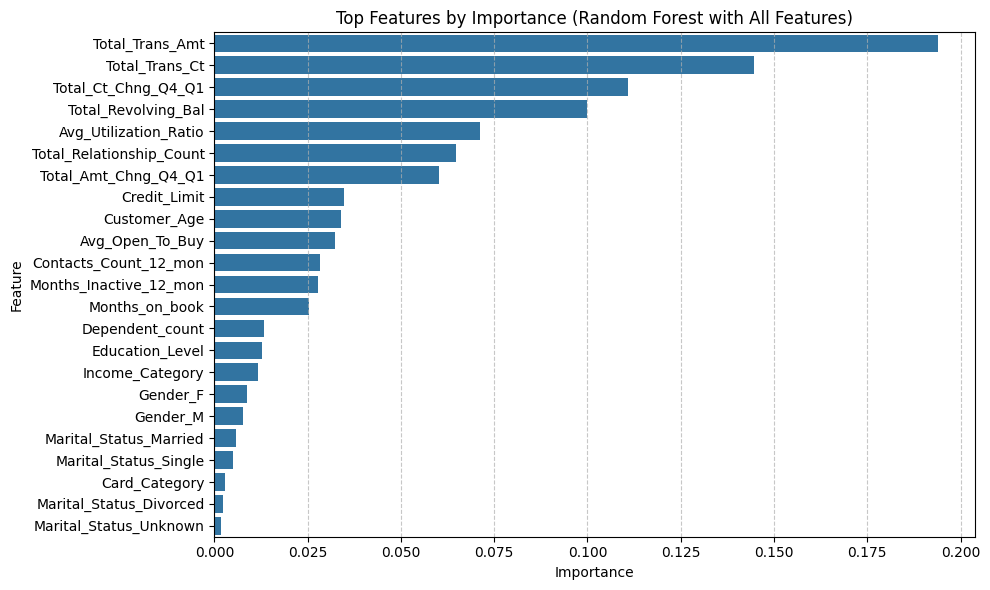

In [ ]:
# Plot feature importance using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

plt.title("Top Features by Importance (Random Forest with All Features)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

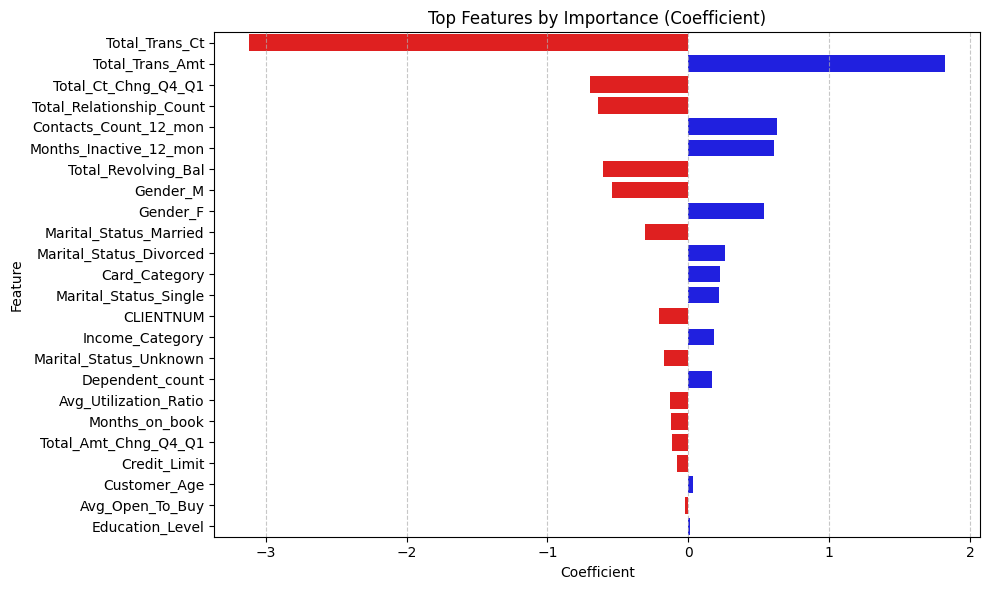

⬆ The top 3 features identified by the logistic regression model are consistent with those from the random forest model. This suggests that these variables likely exert strong influence regardless of the type of model applied.

In [ ]:
print(feature_importance_df['Feature'].tolist())

['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1', 'Credit_Limit', 'Customer_Age', 'Avg_Open_To_Buy', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Months_on_book', 'Dependent_count', 'Education_Level', 'Income_Category', 'Gender_F', 'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single', 'Card_Category', 'Marital_Status_Divorced', 'Marital_Status_Unknown']


Decided to train the model excluding 'Total_Trans_Amt', 'Total_Trans_Ct', and 'Total_Ct_Chng_Q4_Q1'.

#Trial 2: Exclude Top 3 Important variables

###Classify columns

In [ ]:
cols_num

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
high_importance_features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

cols_num_reduced = cols_num
for col in high_importance_features:
    cols_num_reduced.remove(col)
cols_num_reduced

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

###Preprocessing

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cols_num_reduced),
        ('cat', OneHotEncoder(), cols_ctgr_ctgr),
        ('ord', OrdinalEncoder(categories=[education_order, income_order, card_order]), cols_ctgr_ord)
    ])

In [ ]:
preprocessed_data = preprocessor.fit_transform(df)
preprocessed_data

array([[-0.16540558,  0.50336813,  0.38462088, ...,  2.        ,
         3.        ,  1.        ],
       [ 0.33357038,  2.04319867,  1.01071482, ...,  4.        ,
         1.        ,  1.        ],
       [ 0.58305837,  0.50336813,  0.00896451, ...,  4.        ,
         4.        ,  1.        ],
       ...,
       [-0.29014957, -1.03646242,  0.00896451, ...,  2.        ,
         1.        ,  1.        ],
       [-2.03656544, -0.26654715,  0.00896451, ...,  4.        ,
         2.        ,  1.        ],
       [-0.41489356, -0.26654715, -1.36844216, ...,  4.        ,
         1.        ,  2.        ]])

In [ ]:
# Fit and transform the data
preprocessed_data = preprocessor.fit_transform(df)

# To get the column names
num_cols = preprocessor.named_transformers_['num'].get_feature_names_out(cols_num_reduced)
cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cols_ctgr_ctgr)
ord_cols = cols_ctgr_ord  # Ordinal columns remain unchanged

# Combine all columns
all_cols = list(num_cols) + list(cat_cols) + list(ord_cols)

# Convert the transformed data to a DataFrame
preprocessed_df_2nd = pd.DataFrame(preprocessed_data, columns=all_cols, index=df.index)

# Inspect the preprocessed columns
preprocessed_df_2nd

Customer_Age  Dependent_count  Months_on_book  \
0         -0.165406         0.503368        0.384621   
1          0.333570         2.043199        1.010715   
2          0.583058         0.503368        0.008965   
3         -0.789126         1.273283       -0.241473   
4         -0.789126         0.503368       -1.869317   
...             ...              ...             ...   
10122      0.458314        -0.266547        0.509840   
10123     -0.664382        -0.266547       -1.368442   
10124     -0.290150        -1.036462        0.008965   
10125     -2.036565        -0.266547        0.008965   
10126     -0.414894        -0.266547       -1.368442   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      0.763943               -1.327136   
1                      1.407306               -1.327136   
2                      0.120579               -1.327136   
3                     -0.522785                1.641478   
4                      0.763943               -1.327136   
...                         ...                     ...   
10122                 -0.522785               -0.337598   
10123                  0.120579               -0.337598   
10124                  0.763943                0.651940   
10125                  0.120579                0.651940   
10126                  1.407306               -0.337598   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
3                  -1.315636     -0.585251             1.661686   
4                  -2.219655     -0.430877            -1.426858   
...                      ...           ...                  ...   
10122               0.492404     -0.509330             0.844455   
10123               0.492404     -0.479181             1.255524   
10124               1.396424     -0.354626            -1.426858   
10125               0.492404     -0.368710            -1.426858   
10126               1.396424      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_F  \
0             0.488971              2.623494              -0.775882       0.0   
1            -0.008486              3.563293              -0.616276       1.0   
2            -0.445658              8.367214              -0.997155       0.0   
3            -0.734100              2.942843               1.759686       1.0   
4            -0.302868              6.455682              -0.997155       0.0   
...                ...                   ...                    ...       ...   
10122        -0.584929             -0.259771               0.678714       0.0   
10123        -0.591639              0.201004               0.856458       0.0   
10124        -0.226632              0.269436              -0.997155       1.0   
10125        -0.240713             -1.026208              -0.997155       0.0   
10126         0.105372             -0.259771              -0.311572       1.0   

       Gender_M  Marital_Status_Divorced  Marital_Status_Married  \
0           1.0                      0.0                     1.0   
1           0.0                      0.0                     0.0   
2           1.0                      0.0                     1.0   
3           0.0                      0.0                     0.0   
4           1.0                      0.0                     1.0   
...         ...                      ...                     ...   
10122       1.0                      0.0                     0.0   
10123       1.0                      1.0                     0.0   
10124       0.0                      0.0                     1.0   
10125       1.0                      0.0                     0.0   
10126       0.0                      0.0                     1.0   

       Marital_Status_Single  

🔽 Compare with Trial1

In [ ]:
preprocessed_df

Customer_Age  Dependent_count  Months_on_book  \
0         -0.165406         0.503368        0.384621   
1          0.333570         2.043199        1.010715   
2          0.583058         0.503368        0.008965   
3         -0.789126         1.273283       -0.241473   
4         -0.789126         0.503368       -1.869317   
...             ...              ...             ...   
10122      0.458314        -0.266547        0.509840   
10123     -0.664382        -0.266547       -1.368442   
10124     -0.290150        -1.036462        0.008965   
10125     -2.036565        -0.266547        0.008965   
10126     -0.414894        -0.266547       -1.368442   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      0.763943               -1.327136   
1                      1.407306               -1.327136   
2                      0.120579               -1.327136   
3                     -0.522785                1.641478   
4                      0.763943               -1.327136   
...                         ...                     ...   
10122                 -0.522785               -0.337598   
10123                  0.120579               -0.337598   
10124                  0.763943                0.651940   
10125                  0.120579                0.651940   
10126                  1.407306               -0.337598   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
3                  -1.315636     -0.585251             1.661686   
4                  -2.219655     -0.430877            -1.426858   
...                      ...           ...                  ...   
10122               0.492404     -0.509330             0.844455   
10123               0.492404     -0.479181             1.255524   
10124               1.396424     -0.354626            -1.426858   
10125               0.492404     -0.368710            -1.426858   
10126               1.396424      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  Avg_Utilization_Ratio  \
0             0.488971              2.623494  ...              -0.775882   
1            -0.008486              3.563293  ...              -0.616276   
2            -0.445658              8.367214  ...              -0.997155   
3            -0.734100              2.942843  ...               1.759686   
4            -0.302868              6.455682  ...              -0.997155   
...                ...                   ...  ...                    ...   
10122        -0.584929             -0.259771  ...               0.678714   
10123        -0.591639              0.201004  ...               0.856458   
10124        -0.226632              0.269436  ...              -0.997155   
10125        -0.240713             -1.026208  ...              -0.997155   
10126         0.105372             -0.259771  ...              -0.311572   

       Gender_F  Gender_M  Marital_Status_Divorced  Marital_Status_Married  \
0           0.0       1.0                      0.0                     1.0   
1           1.0       0.0                      0.0                     0.0   
2           0.0       1.0                      0.0                     1.0   
3           1.0       0.0                      0.0                     0.0   
4           0.0       1.0                      0.0                     1.0   
...         ...       ...                      ...                     ...   
10122       0.0       1.0                      0.0                     0.0   
10123       0.0       1.0                      1.0                     0.0   
10124       1.0       0.0                      0.0                     1.0   
10125       0.0       1.0                      0.0                     0.0   
10126       1.0       0.0                      0.

In [ ]:
sum(preprocessed_df_2nd['Customer_Age']-preprocessed_df['Customer_Age'])

0.0

In [ ]:
for col in preprocessed_df_2nd.columns:
    print(sum(preprocessed_df_2nd[col]-preprocessed_df[col]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


ColumnTransformer\
├── num: StandardScaler()\
│   <space>├── Customer_Age        → (X - mean) / std\
│   ├── Credit_Limit        → (X - mean) / std\
│   └── ...\
├── cat: OneHotEncoder()\
│   └── Gender              → Male/Female → [1 0] or [0 1]\
├── ord: OrdinalEncoder()\
│  ├── Education_Level     → ['Uneducated', 'High School', ...] → 0,1,2...\
│    └── Card_Category       → ['Blue', 'Silver', ...] → 0,1,2...

The StandardScaler standardizes features by removing the mean and scaling to unit variance. This means that each feature is scaled independently of the others, using the mean and standard deviation of that feature alone.\
Independence of Scaling: StandardScaler scales each numerical feature independently. Therefore, removing some features should not affect the scaling of the remaining features.

###Random Forest

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df_2nd, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8101, 20)
(2026, 20)
(8101,)
(2026,)


In [ ]:
print(X_train.index.equals(y_train.index))
print(X_test.index.equals(y_test.index))

True
True


In [ ]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42) # 100 Trees

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
clf.score(X_train, y_train)

0.9998765584495741

In [ ]:
clf.score(X_test, y_test)

0.8884501480750246

In [ ]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [ ]:
print(len(df[df['Attrition_Flag']=='Existing Customer'])/len(df))
print(len(df[df['Attrition_Flag']=='Attrited Customer'])/len(df))

0.8393403772094401
0.1606596227905599


In [ ]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8884501480750246

Confusion Matrix:
 [[1663   36]
 [ 190  137]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8975    0.9788    0.9364      1699
           1     0.7919    0.4190    0.5480       327

    accuracy                         0.8885      2026
   macro avg     0.8447    0.6989    0.7422      2026
weighted avg     0.8804    0.8885    0.8737      2026



In [ ]:
importances = clf.feature_importances_

feature_importance_df_2nd = pd.DataFrame({
    'Feature': preprocessed_df_2nd.columns,
    'Importance': importances
})
feature_importance_df_2nd.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance_df_2nd.reset_index(drop=True, inplace=True)
feature_importance_df_2nd

Feature  Importance
0        Total_Revolving_Bal    0.143656
1       Total_Amt_Chng_Q4_Q1    0.134892
2      Avg_Utilization_Ratio    0.090778
3            Avg_Open_To_Buy    0.080614
4               Credit_Limit    0.077619
5      Contacts_Count_12_mon    0.071513
6               Customer_Age    0.066646
7             Months_on_book    0.064492
8   Total_Relationship_Count    0.059861
9     Months_Inactive_12_mon    0.051690
10           Education_Level    0.040768
11           Dependent_count    0.034663
12           Income_Category    0.028879
13    Marital_Status_Married    0.012241
14     Marital_Status_Single    0.010594
15                  Gender_F    0.007072
16                  Gender_M    0.006409
17    Marital_Status_Unknown    0.006262
18   Marital_Status_Divorced    0.005714
19             Card_Category    0.005637

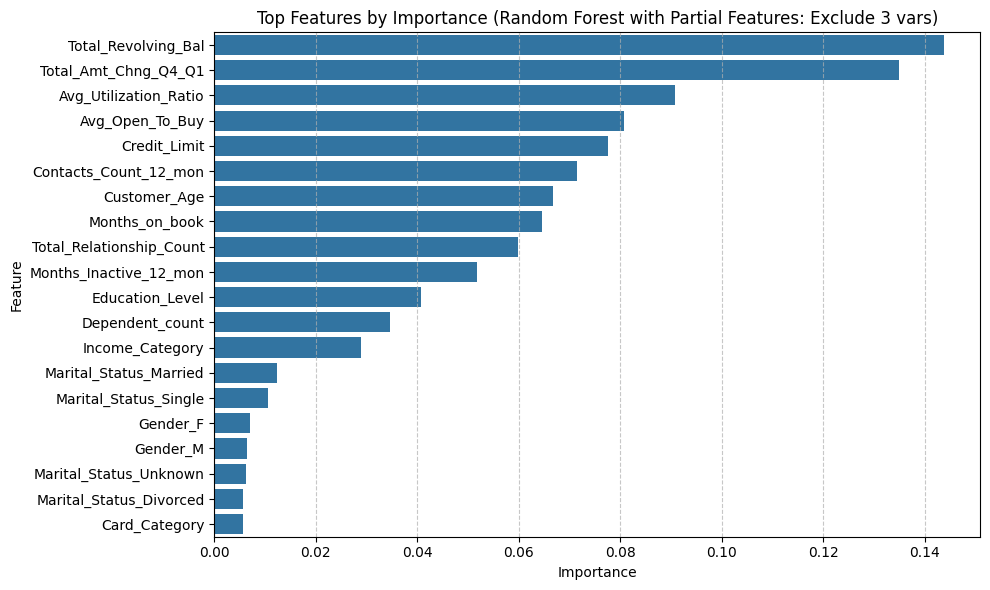

In [ ]:
# Plot feature importance using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_2nd)

plt.title("Top Features by Importance (Random Forest with Partial Features: Exclude 3 vars)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

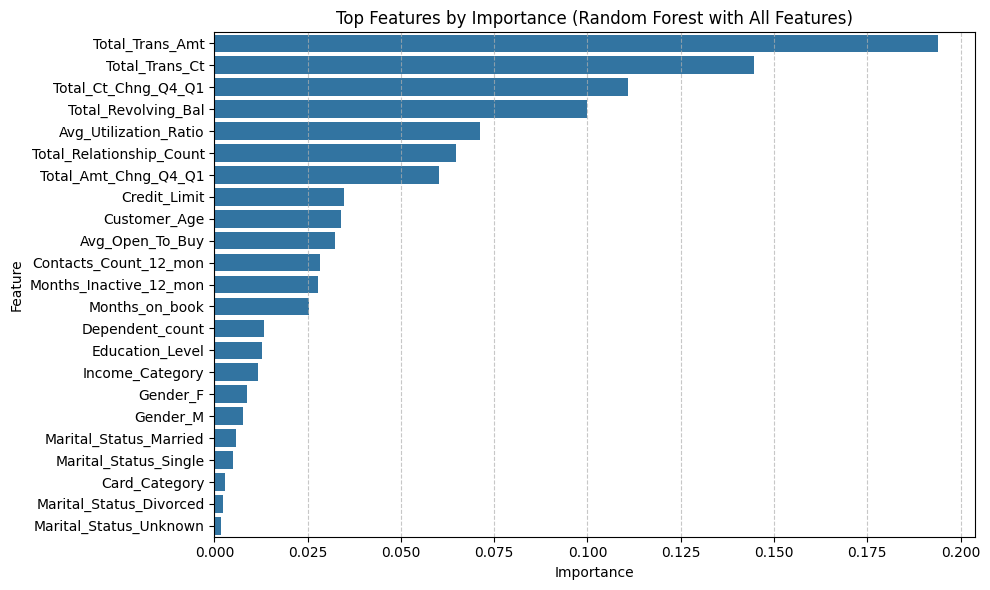

Excluding the top three variables did not significantly alter the overall ranking of feature importance.



#Trial 3: Features accessible for new customers upon onboarding

###Selection of key variables

In [ ]:
cols_num

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
cols_num_known = ['Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Credit_Limit']

In [ ]:
cols_ctgr_ctgr #Same
cols_ctgr_ctgr_known = cols_ctgr_ctgr

In [ ]:
cols_ctgr_ord

['Education_Level', 'Income_Category', 'Card_Category']

In [ ]:
cols_ctgr_ord_known = ['Education_Level', 'Income_Category']

###Preprocessing

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cols_num_known),
        ('cat', OneHotEncoder(), cols_ctgr_ctgr_known),
        ('ord', OrdinalEncoder(categories=[education_order, income_order]), cols_ctgr_ord_known)
    ])

In [ ]:
# Fit and transform the data
preprocessed_data = preprocessor.fit_transform(df)

# To get the column names
num_cols = preprocessor.named_transformers_['num'].get_feature_names_out(cols_num_known)
cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cols_ctgr_ctgr_known)
ord_cols = cols_ctgr_ord_known  # Ordinal columns remain unchanged

# Combine all columns
all_cols = list(num_cols) + list(cat_cols) + list(ord_cols)

# Convert the transformed data to a DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_cols, index=df.index)

# Inspect the preprocessed columns
preprocessed_df

Customer_Age  Dependent_count  Total_Relationship_Count  Credit_Limit  \
0         -0.165406         0.503368                  0.763943      0.446622   
1          0.333570         2.043199                  1.407306     -0.041367   
2          0.583058         0.503368                  0.120579     -0.573698   
3         -0.789126         1.273283                 -0.522785     -0.585251   
4         -0.789126         0.503368                  0.763943     -0.430877   
...             ...              ...                       ...           ...   
10122      0.458314        -0.266547                 -0.522785     -0.509330   
10123     -0.664382        -0.266547                  0.120579     -0.479181   
10124     -0.290150        -1.036462                  0.763943     -0.354626   
10125     -2.036565        -0.266547                  0.120579     -0.368710   
10126     -0.414894        -0.266547                  1.407306      0.193220   

       Gender_F  Gender_M  Marital_Status_Divorced  Marital_Status_Married  \
0           0.0       1.0                      0.0                     1.0   
1           1.0       0.0                      0.0                     0.0   
2           0.0       1.0                      0.0                     1.0   
3           1.0       0.0                      0.0                     0.0   
4           0.0       1.0                      0.0                     1.0   
...         ...       ...                      ...                     ...   
10122       0.0       1.0                      0.0                     0.0   
10123       0.0       1.0                      1.0                     0.0   
10124       1.0       0.0                      0.0                     1.0   
10125       0.0       1.0                      0.0                     0.0   
10126       1.0       0.0                      0.0                     1.0   

       Marital_Status_Single  Marital_Status_Unknown  Education_Level  \
0                        0.0                     0.0              2.0   
1                        1.0                     0.0              4.0   
2                        0.0                     0.0              4.0   
3                        0.0                     1.0              2.0   
4                        0.0                     0.0              1.0   
...                      ...                     ...              ...   
10122                    1.0                     0.0              4.0   
10123                    0.0                     0.0              0.0   
10124                    0.0                     0.0              2.0   
10125                    0.0                     1.0              4.0   
10126                    0.0                     0.0              4.0   

       Income_Category  
0                  3.0  
1                  1.0  
2                  4.0  
3                  1.0  
4                  3.0  
...                ...  
10122              2.0  
10123              2.0  
10124              1.0  
10125              2.0  
10126              1.0  

[10127 rows x 12 columns]

In [ ]:
df['Education_Level'].drop_duplicates()

0       High School
1          Graduate
4        Uneducated
6           Unknown
12          College
16    Post-Graduate
20        Doctorate
Name: Education_Level, dtype: object

In [ ]:
preprocessed_df['Education_Level'].drop_duplicates()

0     2.0
1     4.0
4     1.0
6     0.0
12    3.0
16    5.0
20    6.0
Name: Education_Level, dtype: float64

In [ ]:
df['Income_Category'].drop_duplicates()

0        $60K - $80K
1     Less than $40K
2       $80K - $120K
5        $40K - $60K
6            $120K +
19           Unknown
Name: Income_Category, dtype: object

In [ ]:
preprocessed_df['Income_Category'].drop_duplicates()

0     3.0
1     1.0
2     4.0
5     2.0
6     5.0
19    0.0
Name: Income_Category, dtype: float64

###Random Forest

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8101, 12)
(2026, 12)
(8101,)
(2026,)


In [ ]:
print(X_train.index.equals(y_train.index))
print(X_test.index.equals(y_test.index))

True
True


In [ ]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42) # 100 Trees

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
clf.score(X_train, y_train)

0.9998765584495741

In [ ]:
clf.score(X_test, y_test)

0.8321816386969397

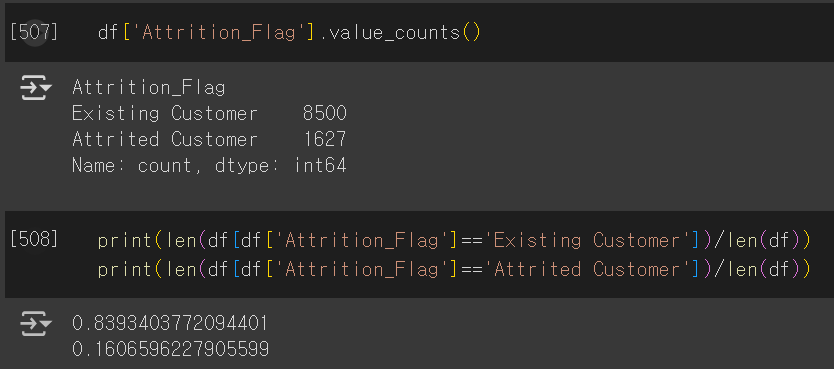

A score of 0.832 indicates that the model underperforms even the naive strategy of predicting all cases as 'Existing' (0.839)

In [ ]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8321816386969397

Confusion Matrix:
 [[1668   31]
 [ 309   18]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8437    0.9818    0.9075      1699
           1     0.3673    0.0550    0.0957       327

    accuracy                         0.8322      2026
   macro avg     0.6055    0.5184    0.5016      2026
weighted avg     0.7668    0.8322    0.7765      2026



The F1-score for the 'Attrited' class (1) is very low

###Oversampling: SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Oversample the minority class
smote = SMOTE(random_state=42)
smote

SMOTE(random_state=42)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_resampled

Customer_Age  Dependent_count  Total_Relationship_Count  Credit_Limit  \
0          0.957290        -1.036462                 -1.809512     -0.540138   
1          1.456266         1.273283                 -1.809512     -0.356056   
2         -0.165406         1.273283                  1.407306      0.809285   
3         -1.537589        -0.266547                  0.120579     -0.550921   
4          0.333570        -0.266547                  0.763943     -0.650500   
...             ...              ...                       ...           ...   
13597     -0.265358        -0.266547                 -0.287019     -0.546501   
13598      0.622191         0.503368                  1.250191     -0.328945   
13599      1.228993        -1.063884                  0.786857     -0.730101   
13600      1.830498        -1.124653                 -1.735817     -0.200457   
13601      1.174652        -0.508597                 -0.963884     -0.778461   

       Gender_F  Gender_M  Marital_Status_Divorced  Marital_Status_Married  \
0           1.0       0.0                      0.0                     0.0   
1           1.0       0.0                      0.0                     1.0   
2           1.0       0.0                      0.0                     0.0   
3           1.0       0.0                      0.0                     0.0   
4           1.0       0.0                      0.0                     1.0   
...         ...       ...                      ...                     ...   
13597       0.0       1.0                      0.0                     0.0   
13598       0.0       1.0                      0.0                     0.0   
13599       0.0       1.0                      0.0                     1.0   
13600       0.0       1.0                      0.0                     0.0   
13601       1.0       0.0                      0.0                     1.0   

       Marital_Status_Single  Marital_Status_Unknown  Education_Level  \
0                   1.000000                0.000000         0.000000   
1                   0.000000                0.000000         2.000000   
2                   1.000000                0.000000         0.000000   
3                   1.000000                0.000000         4.000000   
4                   0.000000                0.000000         2.000000   
...                      ...                     ...              ...   
13597               1.000000                0.000000         2.000000   
13598               1.000000                0.000000         4.000000   
13599               0.000000                0.000000         3.035617   
13600               0.114545                0.885455         4.000000   
13601               0.000000                0.000000         2.000000   

       Income_Category  
0                  0.0  
1                  0.0  
2                  1.0  
3                  1.0  
4                  2.0  
...                ...  
13597              3.0  
13598              2.0  
13599              3.0  
13600              3.0  
13601              2.0  

[13602 rows x 12 columns]

In [ ]:
y_resampled

0        0
1        1
2        0
3        0
4        0
        ..
13597    1
13598    1
13599    1
13600    1
13601    1
Name: Attrition_Flag_Binary, Length: 13602, dtype: int64

In [ ]:
y_resampled.sum()

6801

In [ ]:
y_resampled.sum()/len(y_resampled) #50%

0.5

In [ ]:
# Train the model on resampled data
clf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
clf_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
print(clf_resampled.score(X_resampled, y_resampled))
print(clf_resampled.score(X_test, y_test))

0.9999264813997941
0.8089832181638696


In [ ]:
y_pred_resampled = clf_resampled.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_resampled))
print()
print("Classification Report:\n", classification_report(y_test, y_pred_resampled, digits=4))

Accuracy: 0.8089832181638696

Confusion Matrix:
 [[1589  110]
 [ 277   50]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8516    0.9353    0.8914      1699
           1     0.3125    0.1529    0.2053       327

    accuracy                         0.8090      2026
   macro avg     0.5820    0.5441    0.5484      2026
weighted avg     0.7645    0.8090    0.7807      2026



While the F1-score for the attrited class increased, the overall accuracy decreased

###Oversampling: ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
# Apply ADASYN to the training data
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [ ]:
# Train the Random Forest model on the resampled data
clf_adasyn = RandomForestClassifier(n_estimators=100, random_state=42)
clf_adasyn.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
print(clf_adasyn.score(X_resampled, y_resampled))
print(clf_adasyn.score(X_test, y_test))

0.9999250992435024
0.8173741362290227


In [ ]:
y_pred_resampled = clf_adasyn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_resampled))
print()
print("Classification Report:\n", classification_report(y_test, y_pred_resampled, digits=4))

Accuracy: 0.8173741362290227

Confusion Matrix:
 [[1605   94]
 [ 276   51]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8533    0.9447    0.8966      1699
           1     0.3517    0.1560    0.2161       327

    accuracy                         0.8174      2026
   macro avg     0.6025    0.5503    0.5564      2026
weighted avg     0.7723    0.8174    0.7868      2026



The performance was slightly better than that achieved using SMOTE.

In [ ]:
# # List of n_neighbors values to experiment with
# n_neighbors_list = [3, 5, 7, 10]

# # Dictionary to hold results
# results = {}

# # Evaluate each n_neighbors value
# for n_neighbors in n_neighbors_list:
#     print(f"Evaluating n_neighbors={n_neighbors}")

#     # Apply ADASYN with the current n_neighbors
#     adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=n_neighbors)
#     X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

#     # Train the Random Forest model on the resampled data
#     clf_adasyn = RandomForestClassifier(n_estimators=100, random_state=42)
#     clf_adasyn.fit(X_resampled, y_resampled)

#     # Make predictions on the test set
#     y_pred_resampled = clf_adasyn.predict(X_test)

#     # Evaluate the model
#     accuracy = accuracy_score(y_test, y_pred_resampled)
#     confusion = confusion_matrix(y_test, y_pred_resampled)
#     classification = classification_report(y_test, y_pred_resampled, digits=4)

#     # Store results
#     results[n_neighbors] = {
#         'accuracy': accuracy,
#         'confusion_matrix': confusion,
#         'classification_report': classification
#     }

# # Print results
# for n_neighbors, result in results.items():
#     print(f"Results for n_neighbors={n_neighbors}:")
#     print(f"Accuracy: {result['accuracy']:.4f}")
#     print("Confusion Matrix:\n", result['confusion_matrix'])
#     print("Classification Report:\n", result['classification_report'])
#     print("\n")

The best performance was observed with n_neighbors=5, so this value was adopted (code commented out due to long execution time).

###ADASYN + Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# # Initialize the Random Forest model
# rf = RandomForestClassifier(random_state=42)

# # Initialize RandomizedSearchCV
# rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [ ]:
# Fit the random search model
# rf_random.fit(X_resampled, y_resampled)

fit step is commented out due to long execution time.

In [ ]:
# # Best parameters
# print(rf_random.best_params_)

Best Parameters:\
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}

In [ ]:
# best_rf = rf_random.best_estimator_
# best_rf

In [ ]:
import joblib

In [ ]:
# Save the best model to a file
# joblib.dump(best_rf, 'best_rf_model.joblib')

In [ ]:
# Load the saved model from the file
# best_rf = joblib.load('best_rf_model.joblib')

In [ ]:
# best_rf.fit(X_resampled, y_resampled)

In [ ]:
# # Evaluate the model
# y_pred_best_rf = best_rf.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
# print()
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
# print()
# print("Classification Report:\n", classification_report(y_test, y_pred_best_rf, digits=4))

The performance was lower than when using ADASYN alone

In [ ]:
# best_rf.score(X_resampled, y_resampled)

In [ ]:
# best_rf.score(X_test, y_test)

In [ ]:
# # Get the depths of all trees in the forest
# tree_depths = [estimator.tree_.max_depth for estimator in best_rf.estimators_]

# # Get the maximum depth of each tree
# print("Tree depths:", tree_depths)

# # Get the maximum depth of the entire forest
# max_depth = np.max(tree_depths)
# print("Maximum depth of the forest:", max_depth)

🔽 Overfitting mitigation attempt

In [ ]:
from sklearn.metrics import make_scorer, f1_score

In [ ]:
# # Apply ADASYN to the training data
# adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
# X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# # Define a refined parameter grid
# param_grid_refined = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'bootstrap': [True]
# }

# # Initialize the Random Forest model
# rf = RandomForestClassifier(random_state=42)

# # Initialize RandomizedSearchCV with refined grid
# rf_random_refined = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_refined, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring=make_scorer(f1_score, pos_label=1))

# # Fit the random search model
# rf_random_refined.fit(X_resampled, y_resampled)

In [ ]:
# Best parameters
# print(rf_random_refined.best_params_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}

In [ ]:
# best_rf = rf_random_refined.best_estimator_

In [ ]:
# best_rf.score(X_resampled, y_resampled)

In [ ]:
# best_rf.score(X_test, y_test)

In [ ]:
# # Get the depths of all trees in the forest
# tree_depths = [estimator.tree_.max_depth for estimator in best_rf.estimators_]

# # Get the maximum depth of each tree
# print("Tree depths:", tree_depths)

# # Get the maximum depth of the entire forest
# max_depth = np.max(tree_depths)
# print("Maximum depth of the forest:", max_depth)

In [ ]:
# # Define a refined parameter grid
# param_grid_refined = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'bootstrap': [True]
# }

# # Initialize the Random Forest model
# rf = RandomForestClassifier(random_state=42)

# # Initialize RandomizedSearchCV with refined grid
# rf_random_refined = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_refined, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring=make_scorer(f1_score, pos_label=1))

# # Fit the random search model
# rf_random_refined.fit(X_resampled, y_resampled)

In [ ]:
# Best parameters
# print(rf_random_refined.best_params_)

{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}

In [ ]:
# best_rf = rf_random_refined.best_estimator_
# print(best_rf.score(X_resampled, y_resampled))
# print(best_rf.score(X_test, y_test))

In [ ]:
# # Define a refined parameter grid
# param_grid_refined = {
#     'n_estimators': [50, 100],
#     'max_depth': [5, 10],
#     'min_samples_split': [20, 40],
#     'min_samples_leaf': [10, 20],
#     'bootstrap': [True]
# }

# # Initialize the Random Forest model
# rf = RandomForestClassifier(random_state=42)

# # Initialize RandomizedSearchCV with refined grid
# rf_random_refined = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_refined, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring=make_scorer(f1_score, pos_label=1))

# # Fit the random search model
# rf_random_refined.fit(X_resampled, y_resampled)

In [ ]:
# Best parameters
# print(rf_random_refined.best_params_)

{'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 10, 'bootstrap': True}

In [ ]:
# best_rf = rf_random_refined.best_estimator_
# print(best_rf.score(X_resampled, y_resampled))
# print(best_rf.score(X_test, y_test))

test set에 대한 accuracy도 감소해버림

In [ ]:
# # Define a refined parameter grid
# param_grid_refined = {
#     'n_estimators': [50, 100],
#     'max_depth': [5, 10],
#     'min_samples_split': [5, 10],
#     'min_samples_leaf': [2, 4],
#     'bootstrap': [True]
# }

# # Initialize the Random Forest model
# rf = RandomForestClassifier(random_state=42)

# # Initialize RandomizedSearchCV with refined grid
# rf_random_refined = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_refined, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring=make_scorer(f1_score, pos_label=1))

# # Fit the random search model
# rf_random_refined.fit(X_resampled, y_resampled)

In [ ]:
# Best parameters
# print(rf_random_refined.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}

In [ ]:
# best_rf = rf_random_refined.best_estimator_
# print(best_rf.score(X_resampled, y_resampled))
# print(best_rf.score(X_test, y_test))

✅ (To the best of my findings,) there was no case where combining ADASYN with hyperparameter tuning outperformed using ADASYN alone in terms of accuracy or F1-score for the attrited class

###ADASYN + Adjust Class Weights

🔽 ADASYN

In [ ]:
# Apply ADASYN to the training data
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [ ]:
# Train the Random Forest model on the resampled data
clf_adasyn = RandomForestClassifier(n_estimators=100, random_state=42)
clf_adasyn.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
print(clf_adasyn.score(X_resampled, y_resampled))
print(clf_adasyn.score(X_test, y_test))

0.9999250992435024
0.8173741362290227


In [ ]:
# Evaluate the model
y_pred = clf_adasyn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8173741362290227

Confusion Matrix:
 [[1605   94]
 [ 276   51]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8533    0.9447    0.8966      1699
           1     0.3517    0.1560    0.2161       327

    accuracy                         0.8174      2026
   macro avg     0.6025    0.5503    0.5564      2026
weighted avg     0.7723    0.8174    0.7868      2026



🔽 ADASYN + Adjust Class Weights

In [ ]:
clf_adasyn = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=15, class_weight={0: 1, 1: 3})
clf_adasyn.fit(X_resampled, y_resampled)

print(clf_adasyn.score(X_resampled, y_resampled))
print(clf_adasyn.score(X_test, y_test))
print()

# Evaluate the model
y_pred = clf_adasyn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

0.8975357651112276
0.6663376110562685

Accuracy: 0.6663376110562685

Confusion Matrix:
 [[1209  490]
 [ 186  141]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8667    0.7116    0.7815      1699
           1     0.2235    0.4312    0.2944       327

    accuracy                         0.6663      2026
   macro avg     0.5451    0.5714    0.5379      2026
weighted avg     0.7629    0.6663    0.7029      2026



The F1-score for the attrited class slightly increased, but the overall accuracy dropped significantly.

This model is designed to work with features available at the time of customer onboarding.\
 In this context, retaining valuable customers may be more critical than identifying those who may churn. (The exact loss associated with churn after onboarding is domain-specific and therefore unclear at this stage. In general, even if customers churn after a short period, they may still generate profit during their usage period — unless it's an extreme case such as bankruptcy leading to unpaid revolving balances.)\
 Therefore, achieving higher precision or F1-score for the non-attrited class(0) may lead to greater business impact.

🔽 Default

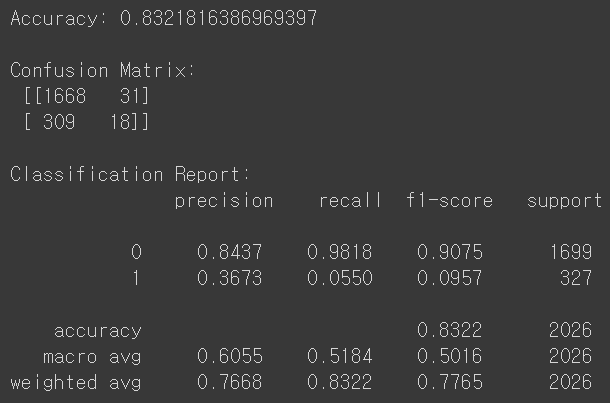

🔽 SMOTE

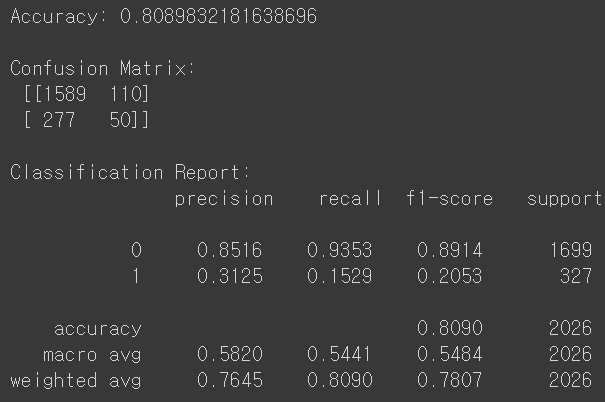

🔽 ADASYN

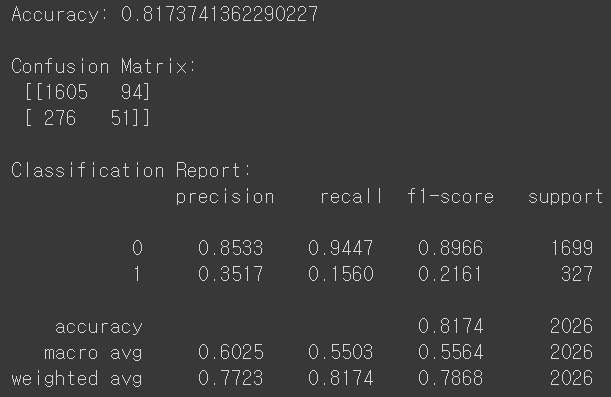

- ADASYN outperformed SMOTE across most evaluation metrics.

- Compared to the baseline Random Forest without resampling, ADASYN showed slightly lower performance in predicting non-attrited customers and overall accuracy, but achieved superior results in identifying attrited customers.

###Apply Final Model to Original Dataset

Final Model: ADASYN

In [ ]:
# Apply ADASYN to the training data
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Train the Random Forest model on the resampled data
clf_adasyn = RandomForestClassifier(n_estimators=100, random_state=42)
clf_adasyn.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

Preprocess Origin Dataset

In [ ]:
df_origin = df.copy()

In [ ]:
df_origin

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0                  39  ...                      3       12691.0   
1                  44  ...                      2        8256.0   
2                  36  ...                      0        3418.0   
3                  34  ...                      1        3313.0   
4                  21  ...                      0        4716.0   
...               ...  ...                    ...           ...   
10122              40  ...                      3        4003.0   
10123              25  ...                      3        4277.0   
10124              36  ...                      4        5409.0   
10125              36  ...                      3        5281.0   
10126              25  ...                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777          11914.0                 1.335   
1                      864           7392.0                 1.541   
2                        0           3418.0                 2.594   
3                     2517            796.0                 1.405   
4                        0           4716.0                 2.175   
...                    ...              ...                   ...   
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...                  ...   
10122            15476             117                0.857   
10123             8764              69                0.683   
10124            10291              60  

In [ ]:
# Fit and transform the data
preprocessed_data = preprocessor.fit_transform(df_origin)

# To get the column names
num_cols = preprocessor.named_transformers_['num'].get_feature_names_out(cols_num_known)
cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cols_ctgr_ctgr_known)
ord_cols = cols_ctgr_ord_known  # Ordinal columns remain unchanged

# Combine all columns
all_cols = list(num_cols) + list(cat_cols) + list(ord_cols)

# Convert the transformed data to a DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_cols, index=df.index)

# Inspect the preprocessed columns
preprocessed_df

Customer_Age  Dependent_count  Total_Relationship_Count  Credit_Limit  \
0         -0.165406         0.503368                  0.763943      0.446622   
1          0.333570         2.043199                  1.407306     -0.041367   
2          0.583058         0.503368                  0.120579     -0.573698   
3         -0.789126         1.273283                 -0.522785     -0.585251   
4         -0.789126         0.503368                  0.763943     -0.430877   
...             ...              ...                       ...           ...   
10122      0.458314        -0.266547                 -0.522785     -0.509330   
10123     -0.664382        -0.266547                  0.120579     -0.479181   
10124     -0.290150        -1.036462                  0.763943     -0.354626   
10125     -2.036565        -0.266547                  0.120579     -0.368710   
10126     -0.414894        -0.266547                  1.407306      0.193220   

       Gender_F  Gender_M  Marital_Status_Divorced  Marital_Status_Married  \
0           0.0       1.0                      0.0                     1.0   
1           1.0       0.0                      0.0                     0.0   
2           0.0       1.0                      0.0                     1.0   
3           1.0       0.0                      0.0                     0.0   
4           0.0       1.0                      0.0                     1.0   
...         ...       ...                      ...                     ...   
10122       0.0       1.0                      0.0                     0.0   
10123       0.0       1.0                      1.0                     0.0   
10124       1.0       0.0                      0.0                     1.0   
10125       0.0       1.0                      0.0                     0.0   
10126       1.0       0.0                      0.0                     1.0   

       Marital_Status_Single  Marital_Status_Unknown  Education_Level  \
0                        0.0                     0.0              2.0   
1                        1.0                     0.0              4.0   
2                        0.0                     0.0              4.0   
3                        0.0                     1.0              2.0   
4                        0.0                     0.0              1.0   
...                      ...                     ...              ...   
10122                    1.0                     0.0              4.0   
10123                    0.0                     0.0              0.0   
10124                    0.0                     0.0              2.0   
10125                    0.0                     1.0              4.0   
10126                    0.0                     0.0              4.0   

       Income_Category  
0                  3.0  
1                  1.0  
2                  4.0  
3                  1.0  
4                  3.0  
...                ...  
10122              2.0  
10123              2.0  
10124              1.0  
10125              2.0  
10126              1.0  

[10127 rows x 12 columns]

In [ ]:
# Make predictions on the preprocessed original data
predictions = clf_adasyn.predict(preprocessed_df)
predicted_probabilities = clf_adasyn.predict_proba(preprocessed_df)

# Combine predictions with the original DataFrame
df_origin['Predicted_Attrition_Flag'] = predictions
df_origin['Attrition_Probability'] = predicted_probabilities[:, 1]  # Probability of class 1 (Attrition)

df_origin

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                  39  ...                  777          11914.0   
1                  44  ...                  864           7392.0   
2                  36  ...                    0           3418.0   
3                  34  ...                 2517            796.0   
4                  21  ...                    0           4716.0   
...               ...  ...                  ...              ...   
10122              40  ...                 1851           2152.0   
10123              25  ...                 2186           2091.0   
10124              36  ...                    0           5409.0   
10125              36  ...                    0           5281.0   
10126              25  ...                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Attrition_Flag_Binary  \
0                    1.625                  0.061                      0   
1                    3.714                  0.105                      0   
2                    2.333                  0.000                      0   
3                    2.333                  0.760                      0   
4                    2.500                  0.000                      0   
...                    ...                    ...                    ...   
10122                0.857                  0.462                      0   
10123                0.683                  0.5

In [ ]:
y_true = df['Attrition_Flag_Binary']
accuracy = accuracy_score(y_true, predictions)
conf_matrix = confusion_matrix(y_true, predictions)
class_report = classification_report(y_true, predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9633652611829762
Confusion Matrix:
[[8405   95]
 [ 276 1351]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8500
           1       0.93      0.83      0.88      1627

    accuracy                           0.96     10127
   macro avg       0.95      0.91      0.93     10127
weighted avg       0.96      0.96      0.96     10127



Preprocessing: Ensure the preprocessor is only fitted on the training data.\
Transformation: Use the fitted preprocessor to transform the original data without refitting it.\
Predictions and Evaluation: Make predictions on the transformed original data and evaluate them.

In [ ]:
# Split the data into features and target
X = df.drop(columns=['Attrition_Flag', 'Attrition_Flag_Binary'])
y = df['Attrition_Flag_Binary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
# Transform the test data using the already fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Apply ADASYN to the training data
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X_train_transformed, y_train)

# Train the Random Forest model on the resampled data
clf_adasyn = RandomForestClassifier(n_estimators=100, random_state=42)
clf_adasyn.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred_test = clf_adasyn.predict(X_test_transformed)
predicted_probabilities_test = clf_adasyn.predict_proba(X_test_transformed)

# Evaluate the model's predictions on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

print(f"Test Set Accuracy: {accuracy_test}")
print(f"Test Set Confusion Matrix:\n{conf_matrix_test}")
print(f"Test Set Classification Report:\n{class_report_test}")

Test Set Accuracy: 0.8119447186574531
Test Set Confusion Matrix:
[[1599  100]
 [ 281   46]]
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1699
           1       0.32      0.14      0.19       327

    accuracy                           0.81      2026
   macro avg       0.58      0.54      0.54      2026
weighted avg       0.76      0.81      0.78      2026



In [ ]:
# Transform the original data using the fitted preprocessor
X_original_transformed = preprocessor.transform(X)

# Make predictions on the preprocessed original data
predictions_original = clf_adasyn.predict(X_original_transformed)
predicted_probabilities_original = clf_adasyn.predict_proba(X_original_transformed)

# Combine predictions with the original DataFrame
df_origin = df.copy()
df_origin['Predicted_Attrition_Flag'] = predictions_original
df_origin['Attrition_Probability'] = predicted_probabilities_original[:, 1]  # Probability of class 1 (Attrition)

# Evaluate the model's predictions on the original data
accuracy_original = accuracy_score(y, predictions_original)
conf_matrix_original = confusion_matrix(y, predictions_original)
class_report_original = classification_report(y, predictions_original)

print(f"Original Data Set Accuracy: {accuracy_original}")
print(f"Original Data Set Confusion Matrix:\n{conf_matrix_original}")
print(f"Original Data Set Classification Report:\n{class_report_original}")


Original Data Set Accuracy: 0.9621803100622099
Original Data Set Confusion Matrix:
[[8399  101]
 [ 282 1345]]
Original Data Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8500
           1       0.93      0.83      0.88      1627

    accuracy                           0.96     10127
   macro avg       0.95      0.91      0.93     10127
weighted avg       0.96      0.96      0.96     10127



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the resampled training data
cv_scores = cross_val_score(clf_adasyn, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.65494012 0.94870835 0.94234369 0.93523025 0.94122052]
Mean CV Score: 0.8844885855395163


#[Final Ver] Trial 4: Features accessible for new customers upon onboarding (Ver2)

###Preprocessing

In [ ]:
cols_needed = cols_num_known + cols_ctgr_ctgr_known + cols_ctgr_ord_known
cols_needed

['Customer_Age',
 'Dependent_count',
 'Total_Relationship_Count',
 'Credit_Limit',
 'Gender',
 'Marital_Status',
 'Education_Level',
 'Income_Category']

In [ ]:
# Split the data into features and target
X = df[cols_needed]
y = df['Attrition_Flag_Binary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# *************************************************************
# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
# Transform the test data using the already fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
# Get the column names from the preprocessor
num_cols = preprocessor.named_transformers_['num'].get_feature_names_out(cols_num_known)
cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cols_ctgr_ctgr_known)
ord_cols = cols_ctgr_ord_known  # Ordinal columns remain unchanged

# Combine all column names
all_cols = list(num_cols) + list(cat_cols) + list(ord_cols)

In [ ]:
# Convert the transformed data to a DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_cols, index=X_train.index)
X_train_transformed_df

Customer_Age  Dependent_count  Total_Relationship_Count  Credit_Limit  \
9066      0.959061        -1.035122                 -1.812952     -0.540791   
5814      1.457688         1.291390                 -1.812952     -0.356658   
792      -0.162849         1.291390                  1.409234      0.808999   
1791     -1.534073        -0.259618                  0.120360     -0.551577   
5011      0.335778        -0.259618                  0.764797     -0.651182   
...            ...              ...                       ...           ...   
5734     -0.287506        -1.035122                 -0.524077     -0.494675   
5191      0.834404         0.515886                  0.120360     -0.076773   
5390     -0.536819         1.291390                 -0.524077     -0.695867   
860      -0.786133         0.515886                  0.120360     -0.558401   
7270      0.834404         1.291390                  0.764797     -0.525932   

      Gender_F  Gender_M  Marital_Status_Divorced  Marital_Status_Married  \
9066       1.0       0.0                      0.0                     0.0   
5814       1.0       0.0                      0.0                     1.0   
792        1.0       0.0                      0.0                     0.0   
1791       1.0       0.0                      0.0                     0.0   
5011       1.0       0.0                      0.0                     1.0   
...        ...       ...                      ...                     ...   
5734       1.0       0.0                      0.0                     0.0   
5191       1.0       0.0                      1.0                     0.0   
5390       1.0       0.0                      0.0                     0.0   
860        0.0       1.0                      0.0                     0.0   
7270       0.0       1.0                      0.0                     0.0   

      Marital_Status_Single  Marital_Status_Unknown  Education_Level  \
9066                    1.0                     0.0              0.0   
5814                    0.0                     0.0              2.0   
792                     1.0                     0.0              0.0   
1791                    1.0                     0.0              4.0   
5011                    0.0                     0.0              2.0   
...                     ...                     ...              ...   
5734                    1.0                     0.0              4.0   
5191                    0.0                     0.0              2.0   
5390                    0.0                     1.0              4.0   
860                     1.0                     0.0              0.0   
7270                    1.0                     0.0              2.0   

      Income_Category  
9066              0.0  
5814              0.0  
792               1.0  
1791              1.0  
5011              2.0  
...               ...  
5734              2.0  
5191              0.0  
5390              1.0  
860               2.0  
7270              3.0  

[8101 rows x 12 columns]

In [ ]:
# Convert the transformed test data to a DataFrame
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_cols, index=X_test.index)
X_test_transformed_df

Customer_Age  Dependent_count  Total_Relationship_Count  Credit_Limit  \
3781      0.211121         0.515886                  0.120360     -0.621355   
2922      1.582345        -1.035122                  0.764797     -0.709294   
5070     -1.160103        -0.259618                  0.120360     -0.759702   
7246      0.086464         0.515886                  0.120360     -0.423796   
623      -0.536819         0.515886                 -0.524077     -0.541781   
...            ...              ...                       ...           ...   
1937     -1.534073        -0.259618                 -0.524077      0.523721   
4705     -1.409416        -1.035122                 -1.168515     -0.705002   
8548     -0.287506        -1.035122                 -1.812952     -0.334866   
1346     -2.406670        -1.810626                  1.409234      0.008414   
8802     -0.910789        -1.810626                 -1.812952      1.476740   

      Gender_F  Gender_M  Marital_Status_Divorced  Marital_Status_Married  \
3781       1.0       0.0                      0.0                     0.0   
2922       0.0       1.0                      0.0                     0.0   
5070       1.0       0.0                      1.0                     0.0   
7246       0.0       1.0                      1.0                     0.0   
623        0.0       1.0                      0.0                     0.0   
...        ...       ...                      ...                     ...   
1937       0.0       1.0                      0.0                     0.0   
4705       1.0       0.0                      0.0                     0.0   
8548       1.0       0.0                      1.0                     0.0   
1346       0.0       1.0                      0.0                     0.0   
8802       1.0       0.0                      0.0                     0.0   

      Marital_Status_Single  Marital_Status_Unknown  Education_Level  \
3781                    1.0                     0.0              1.0   
2922                    1.0                     0.0              1.0   
5070                    0.0                     0.0              4.0   
7246                    0.0                     0.0              6.0   
623                     1.0                     0.0              0.0   
...                     ...                     ...              ...   
1937                    1.0                     0.0              4.0   
4705                    1.0                     0.0              3.0   
8548                    0.0                     0.0              1.0   
1346                    1.0                     0.0              4.0   
8802                    1.0                     0.0              0.0   

      Income_Category  
3781              1.0  
2922              1.0  
5070              1.0  
7246              2.0  
623               4.0  
...               ...  
1937              4.0  
4705              1.0  
8548              1.0  
1346              5.0  
8802              2.0  

[2026 rows x 12 columns]

###Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42) # 100 Trees
rf.fit(X_train_transformed, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print(rf.score(X_train_transformed, y_train))
print(rf.score(X_test_transformed, y_test))

0.9998765584495741
0.8321816386969397


In [ ]:
y_pred = rf.predict(X_test_transformed)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8321816386969397

Confusion Matrix:
 [[1668   31]
 [ 309   18]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8437    0.9818    0.9075      1699
           1     0.3673    0.0550    0.0957       327

    accuracy                         0.8322      2026
   macro avg     0.6055    0.5184    0.5016      2026
weighted avg     0.7668    0.8322    0.7765      2026



###ADASYN

✅ Oversampling techniques should be applied prior to model training

In [ ]:
# Split the data into features and target
X = df[cols_needed]
y = df['Attrition_Flag_Binary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply preprocessing to the training data
X_train_transformed = preprocessor.fit_transform(X_train)

In [ ]:
# Apply ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X_train_transformed, y_train)

In [ ]:
# Apply preprocessing to the test data (use preprocessor fitted on training data)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 Trees
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediction
y_pred = rf.predict(X_test_transformed)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8119447186574531

Confusion Matrix:
 [[1599  100]
 [ 281   46]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8505    0.9411    0.8935      1699
           1     0.3151    0.1407    0.1945       327

    accuracy                         0.8119      2026
   macro avg     0.5828    0.5409    0.5440      2026
weighted avg     0.7641    0.8119    0.7807      2026



###Feature Importance

In [ ]:
importances = rf.feature_importances_
importances

array([0.17831498, 0.14011551, 0.20310633, 0.18399254, 0.01088612,
       0.01136772, 0.01561152, 0.02365023, 0.0247843 , 0.01285154,
       0.10467602, 0.0906432 ])

In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': preprocessed_df.columns,
    'Importance': importances
})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance_df.reset_index(drop=True, inplace=True)
feature_importance_df

Feature  Importance
0   Total_Relationship_Count    0.203106
1               Credit_Limit    0.183993
2               Customer_Age    0.178315
3            Dependent_count    0.140116
4            Education_Level    0.104676
5            Income_Category    0.090643
6      Marital_Status_Single    0.024784
7     Marital_Status_Married    0.023650
8    Marital_Status_Divorced    0.015612
9     Marital_Status_Unknown    0.012852
10                  Gender_M    0.011368
11                  Gender_F    0.010886

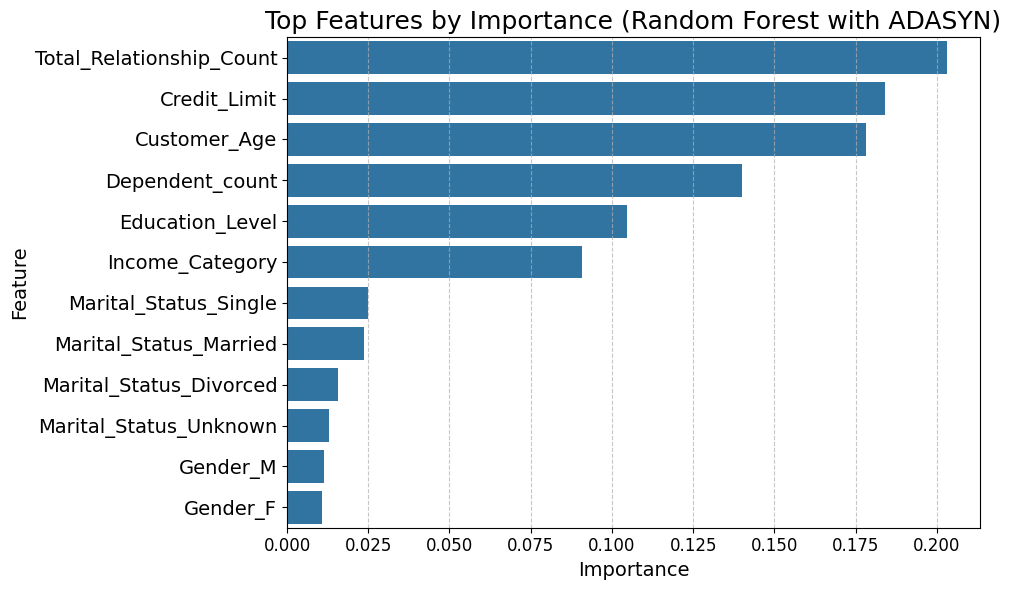

In [ ]:
# Plot feature importance using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

plt.title("Top Features by Importance (Random Forest with ADASYN)", fontsize=18)
plt.xlabel("Importance",fontsize=14)
plt.ylabel("Feature",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
feature_importance_df['Feature'].tolist()

['Total_Relationship_Count',
 'Credit_Limit',
 'Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Income_Category',
 'Marital_Status_Single',
 'Marital_Status_Married',
 'Marital_Status_Divorced',
 'Marital_Status_Unknown',
 'Gender_M',
 'Gender_F']

###Apply Final Model to Original Dataset

In [ ]:
# Apply preprocessing to the entire original dataset
X_all_transformed = preprocessor.transform(X)

In [ ]:
# Generate predictions and prediction scores using the model
y_all_pred = rf.predict(X_all_transformed)
y_all_pred_proba = rf.predict_proba(X_all_transformed)[:, 1]

In [ ]:
# Add prediction results and scores as new columns in the original DataFrame
df['Predicted_Attrition'] = y_all_pred
df['Predicted_Attrition_Probability'] = y_all_pred_proba

In [ ]:
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                  39  ...                  777          11914.0   
1                  44  ...                  864           7392.0   
2                  36  ...                    0           3418.0   
3                  34  ...                 2517            796.0   
4                  21  ...                    0           4716.0   
...               ...  ...                  ...              ...   
10122              40  ...                 1851           2152.0   
10123              25  ...                 2186           2091.0   
10124              36  ...                    0           5409.0   
10125              36  ...                    0           5281.0   
10126              25  ...                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Attrition_Flag_Binary  \
0                    1.625                  0.061                      0   
1                    3.714                  0.105                      0   
2                    2.333                  0.000                      0   
3                    2.333                  0.760                      0   
4                    2.500                  0.000                      0   
...                    ...                    ...                    ...   
10122                0.857                  0.462                      0   
10123                0.683                  0.5

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(df['Attrition_Flag_Binary'], y_all_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(df['Attrition_Flag_Binary'], y_all_pred))
print()
print("Classification Report:\n", classification_report(df['Attrition_Flag_Binary'], y_all_pred, digits=4))

Accuracy: 0.9621803100622099

Confusion Matrix:
 [[8399  101]
 [ 282 1345]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9675    0.9881    0.9777      8500
           1     0.9302    0.8267    0.8754      1627

    accuracy                         0.9622     10127
   macro avg     0.9488    0.9074    0.9265     10127
weighted avg     0.9615    0.9622    0.9613     10127



###Cross Validation

In [ ]:
scores = cross_val_score(rf, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.65494012 0.94870835 0.94234369 0.93523025 0.94122052]
Mean cross-validation score: 0.8844885855395163


In [ ]:
###
scores = cross_val_score(rf, X_train_transformed, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

###Customer Segmentation (Grouping)

In [ ]:
group1_real_0_pred_0 = df[(df['Attrition_Flag_Binary']==0)&(df['Predicted_Attrition']==0)]
group1_real_0_pred_0[['Attrition_Flag_Binary', 'Predicted_Attrition', 'Predicted_Attrition_Probability']]

Attrition_Flag_Binary  Predicted_Attrition  \
0                          0                    0   
1                          0                    0   
2                          0                    0   
3                          0                    0   
4                          0                    0   
...                      ...                  ...   
10116                      0                    0   
10117                      0                    0   
10120                      0                    0   
10121                      0                    0   
10122                      0                    0   

       Predicted_Attrition_Probability  
0                                 0.16  
1                                 0.09  
2                                 0.08  
3                                 0.15  
4                                 0.06  
...                                ...  
10116                             0.29  
10117                             0.00  
10120                             0.18  
10121                             0.07  
10122                             0.08  

[8399 rows x 3 columns]

In [ ]:
group2_real_0_pred_1 = df[(df['Attrition_Flag_Binary']==0)&(df['Predicted_Attrition']==1)]
group2_real_0_pred_1[['Attrition_Flag_Binary', 'Predicted_Attrition', 'Predicted_Attrition_Probability']]

Attrition_Flag_Binary  Predicted_Attrition  \
290                       0                    1   
291                       0                    1   
333                       0                    1   
373                       0                    1   
603                       0                    1   
...                     ...                  ...   
9510                      0                    1   
9611                      0                    1   
9649                      0                    1   
9713                      0                    1   
9771                      0                    1   

      Predicted_Attrition_Probability  
290                              0.68  
291                              0.56  
333                              0.72  
373                              0.68  
603                              0.53  
...                               ...  
9510                             0.53  
9611                             0.57  
9649                             0.64  
9713                             0.63  
9771                             0.55  

[101 rows x 3 columns]

In [ ]:
group3_real_1_pred_0 = df[(df['Attrition_Flag_Binary']==1)&(df['Predicted_Attrition']==0)]
group3_real_1_pred_0[['Attrition_Flag_Binary', 'Predicted_Attrition', 'Predicted_Attrition_Probability']]

Attrition_Flag_Binary  Predicted_Attrition  \
39                         1                    0   
144                        1                    0   
286                        1                    0   
509                        1                    0   
568                        1                    0   
...                      ...                  ...   
10052                      1                    0   
10064                      1                    0   
10067                      1                    0   
10071                      1                    0   
10125                      1                    0   

       Predicted_Attrition_Probability  
39                                0.13  
144                               0.46  
286                               0.15  
509                               0.50  
568                               0.36  
...                                ...  
10052                             0.14  
10064                             0.30  
10067                             0.18  
10071                             0.23  
10125                             0.15  

[282 rows x 3 columns]

In [ ]:
group4_real_1_pred_1 = df[(df['Attrition_Flag_Binary']==1)&(df['Predicted_Attrition']==1)]
group4_real_1_pred_1[['Attrition_Flag_Binary', 'Predicted_Attrition', 'Predicted_Attrition_Probability']]

Attrition_Flag_Binary  Predicted_Attrition  \
21                         1                    1   
51                         1                    1   
54                         1                    1   
61                         1                    1   
82                         1                    1   
...                      ...                  ...   
10118                      1                    1   
10119                      1                    1   
10123                      1                    1   
10124                      1                    1   
10126                      1                    1   

       Predicted_Attrition_Probability  
21                                0.90  
51                                0.90  
54                                0.88  
61                                0.78  
82                                0.79  
...                                ...  
10118                             0.68  
10119                             0.85  
10123                             0.72  
10124                             0.74  
10126                             0.77  

[1345 rows x 3 columns]

###Group Analysis

####Key Variables

In [ ]:
groups = [group1_real_0_pred_0, group2_real_0_pred_1, group3_real_1_pred_0, group4_real_1_pred_1]

In [ ]:
group_names = ['Group 1: 0 | 0', 'Group 2: 0 | 1', 'Group 3: 1 | 0', 'Group 4: 1 | 1']

In [ ]:
feature_importance_df['Feature'].tolist()

['Total_Relationship_Count',
 'Credit_Limit',
 'Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Income_Category',
 'Marital_Status_Single',
 'Marital_Status_Married',
 'Marital_Status_Divorced',
 'Marital_Status_Unknown',
 'Gender_M',
 'Gender_F']

In [ ]:
importance_num = ['Total_Relationship_Count',
                  'Credit_Limit',
                  'Customer_Age',
                  'Dependent_count']

In [ ]:
importance_ctgr = ['Education_Level',
                   'Income_Category',
                   'Marital_Status',
                   'Gender']

In [ ]:
colors = ['blue', 'red', 'orange', 'green']

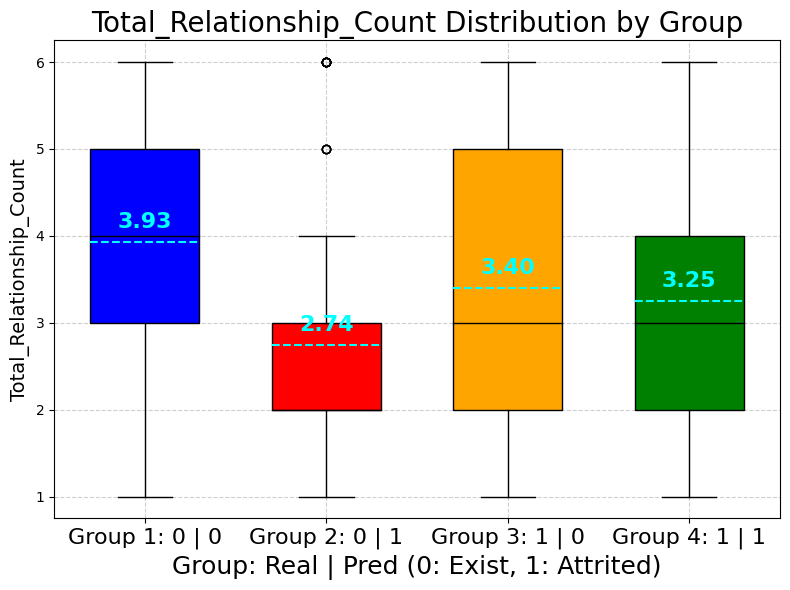

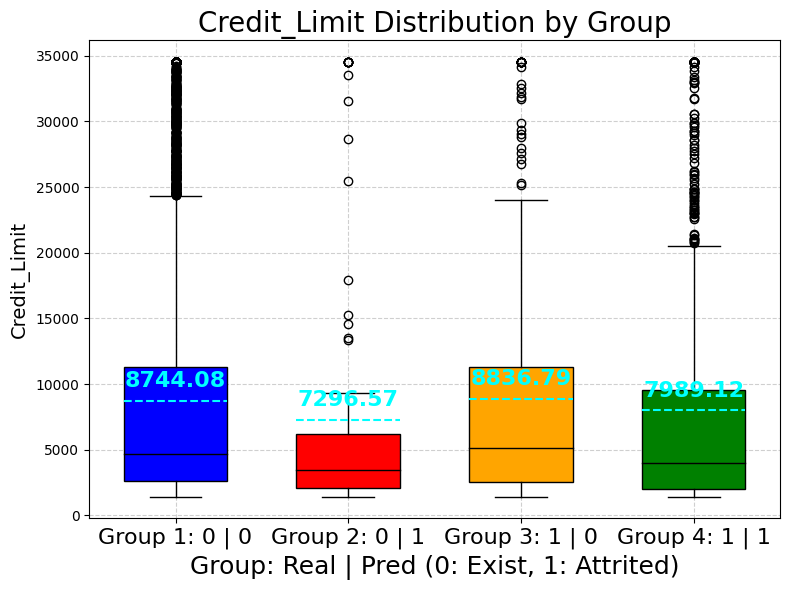

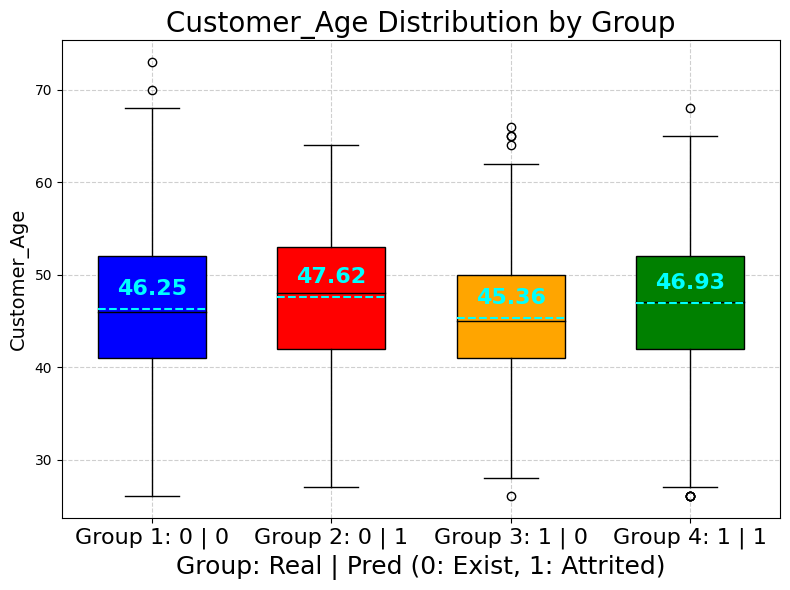

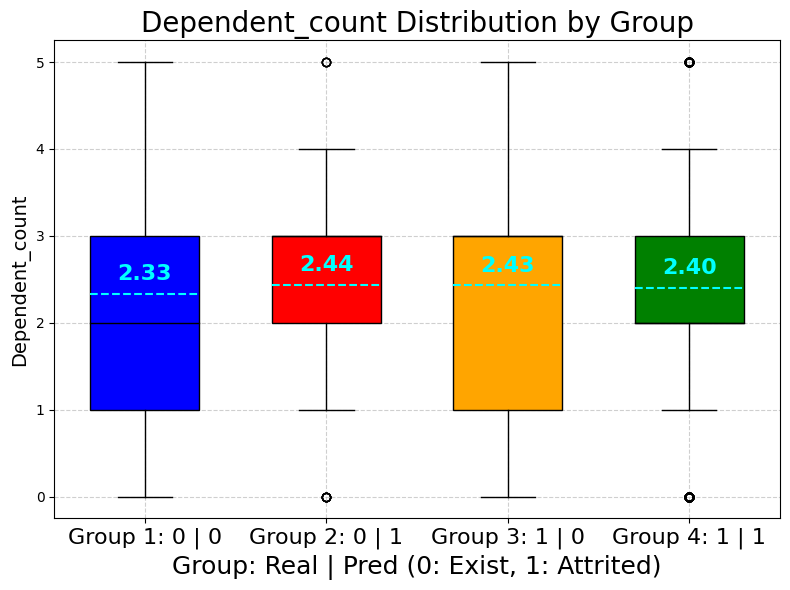

In [ ]:
for col in importance_num:
    data = [group[col].dropna() for group in groups]

    # Create a figure and an axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a boxplot
    bp = ax.boxplot(data, patch_artist=True,showmeans=True, meanline=True,meanprops={'color': 'cyan', 'linestyle': '--', 'linewidth': 1.5},positions=range(1, len(groups) + 1), widths=0.6)  # Adjust positions and widths for better visualization

    # Color each box
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Customize the colors of the whiskers, fliers, caps, and medians
    for element in ['whiskers', 'fliers', 'caps', 'medians']:
        plt.setp(bp[element], color='black')  # Set all to black or choose colors accordingly

    # Set x-tick labels
    ax.set_xticks(range(1, len(groups) + 1))
    ax.set_xticklabels(group_names, fontsize=16)

    # Add labels and title
    ax.set_title(f'{col} Distribution by Group', fontsize=20)
    ax.set_xlabel('Group: Real | Pred (0: Exist, 1: Attrited)', fontsize=18)
    ax.set_ylabel(f'{col}', fontsize=14)

    # Optionally add a grid for better readability
    ax.grid(True, linestyle='--', alpha=0.6)

    # Add mean annotations
    for i in range(len(groups)):
        mean_val = data[i].mean()
        ax.annotate(f'{mean_val:.2f}', xy=(i + 1, mean_val), xytext=(0, 10),
                    textcoords='offset points', ha='center', fontsize=16, color='cyan', fontweight='bold')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
education_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown']
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
marital_order = ['Married', 'Single', 'Divorced', 'Unknown']
gender_order = ['M', 'F']

In [ ]:
order_dict = {
    'Education_Level': education_order,
    'Income_Category': income_order,
    'Marital_Status': marital_order,
    'Gender': gender_order
}

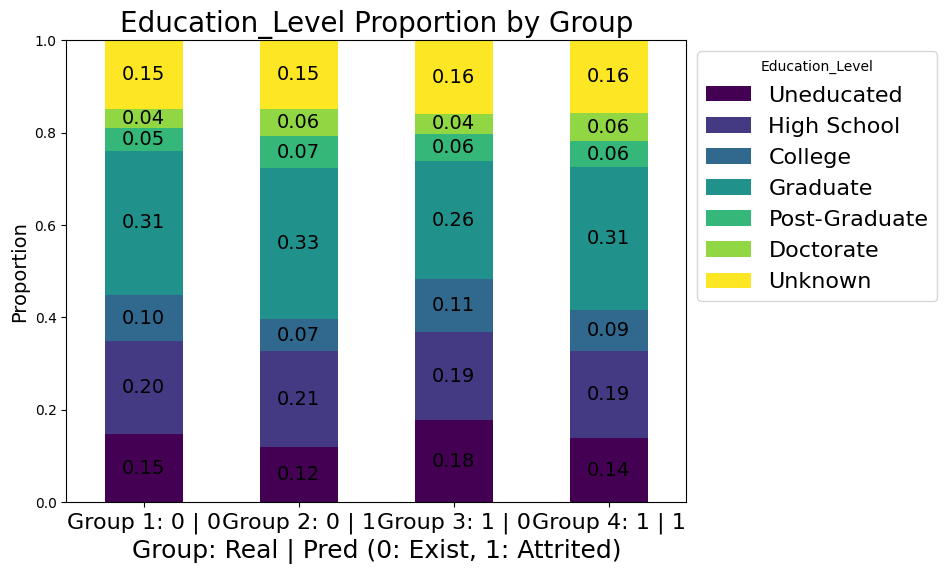

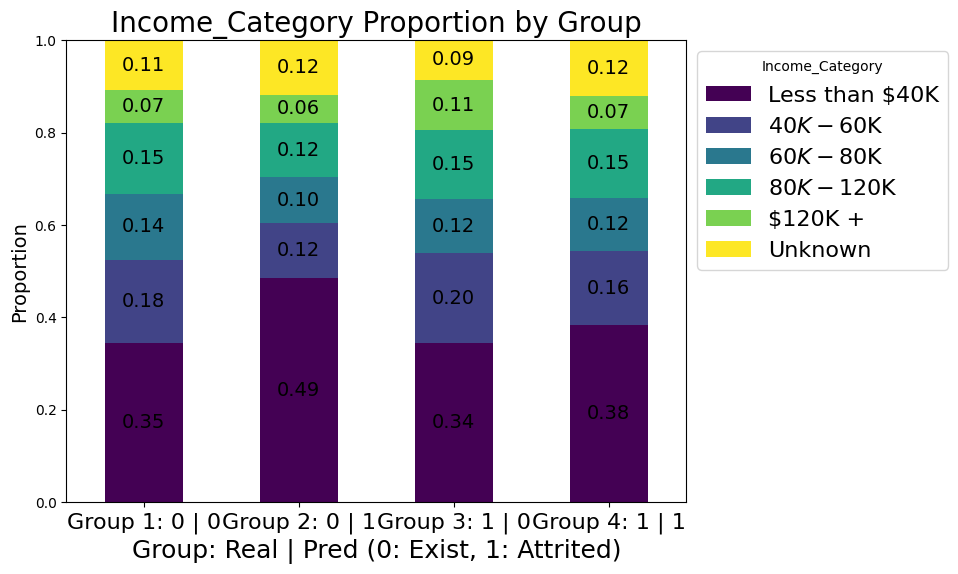

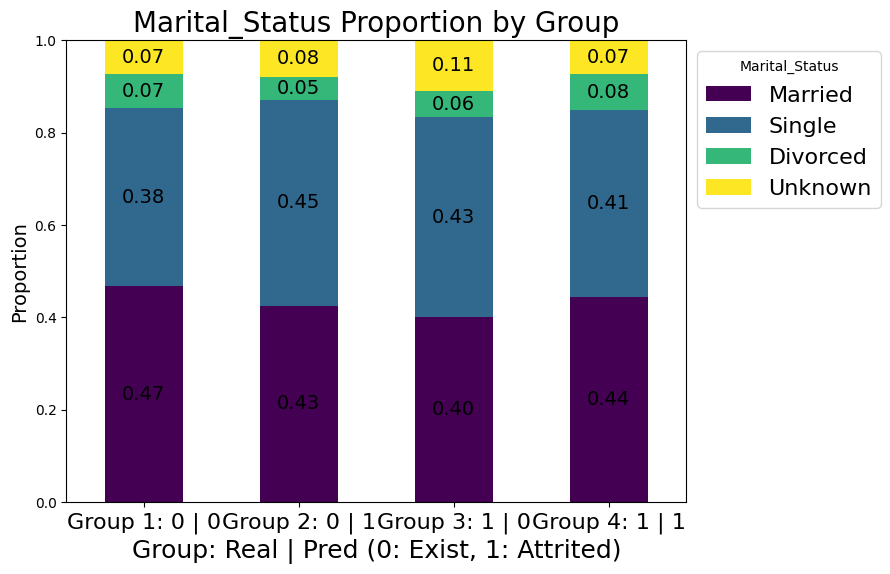

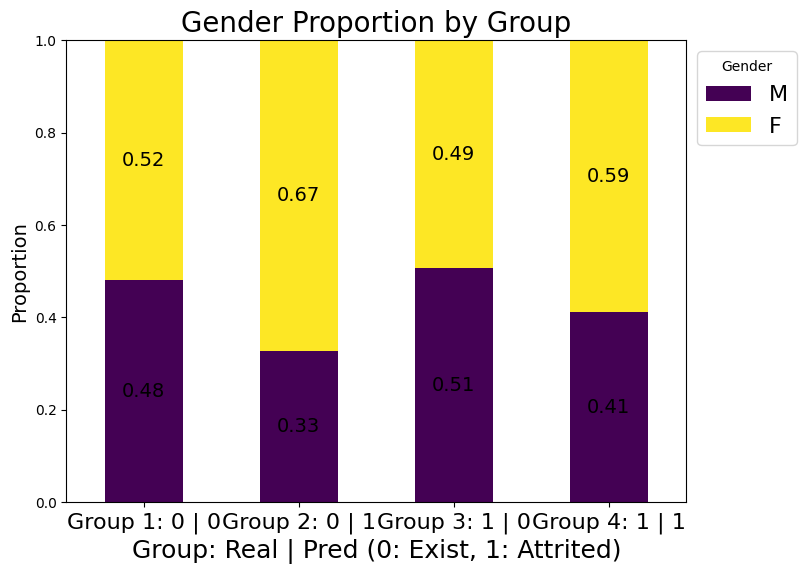

In [ ]:
for col in importance_ctgr:
    order = order_dict[col]

    # Initialize a DataFrame to store the proportional results
    result = pd.DataFrame(index=group_names, columns=order)

    # Process each group
    for group, name in zip(groups, group_names):
        # Calculate the proportion of each category
        proportions = group[col].value_counts(normalize=True)
        # Assign the proportions to the respective group and category
        for status in order:
            result.loc[name, status] = proportions.get(status, 0)  # Use 0 if the category is missing

    # Convert the results to numeric and plot
    result = result.astype(float)  # Ensure all data is float for plotting
    ax = result.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

    # Adding annotations inside the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:  # Only annotate if height is greater than 0
            ax.text(x + width / 2,
                    y + height / 2,
                    f"{height:.2f}",
                    ha='center',
                    va='center',
                    fontsize=14,
                    color='black')

    # Title and labels
    plt.title(f'{col} Proportion by Group', fontsize=20)
    plt.xlabel('Group: Real | Pred (0: Exist, 1: Attrited)', fontsize=18)
    plt.ylabel('Proportion', fontsize=14)
    plt.xticks(rotation=0, fontsize=16)
    plt.legend(title=col, bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=16)
    plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1
    plt.show()

tight-layout

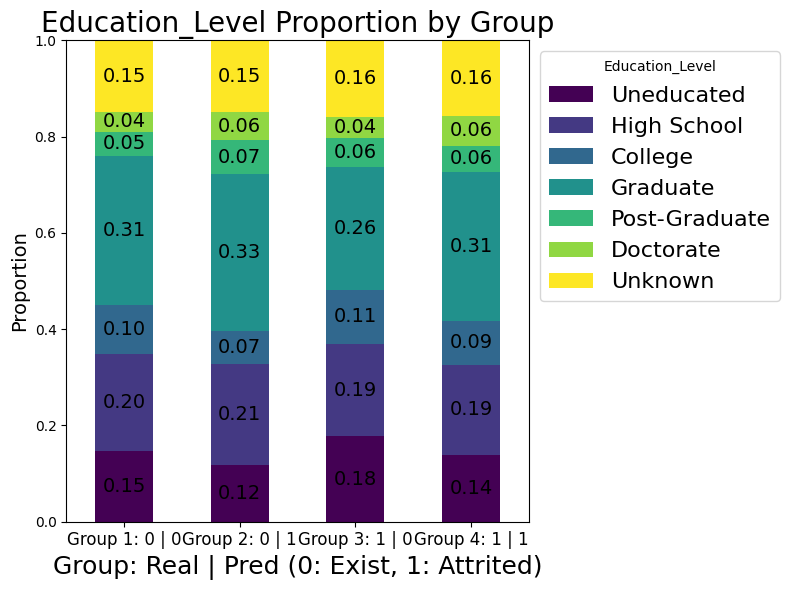

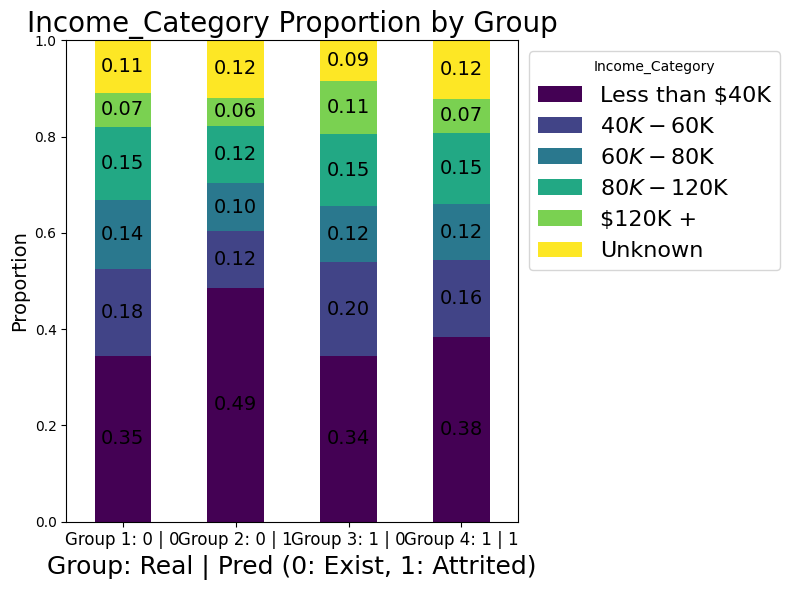

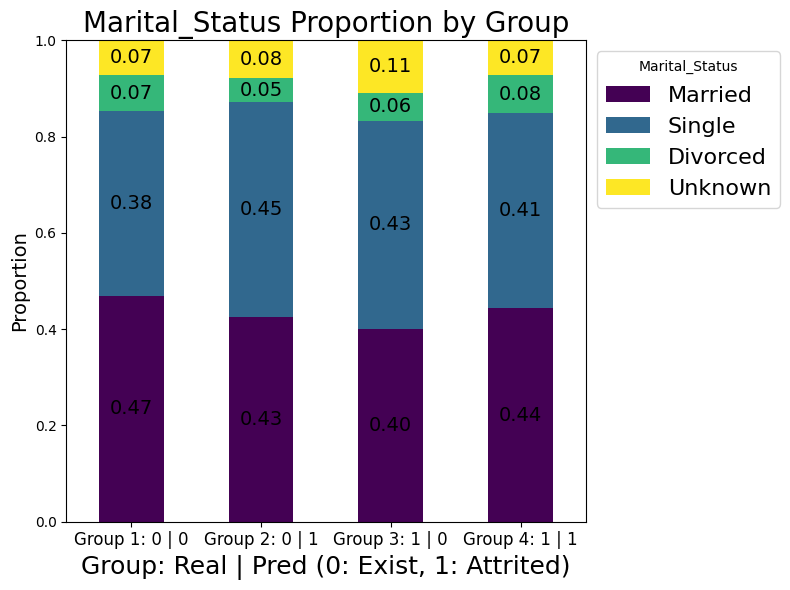

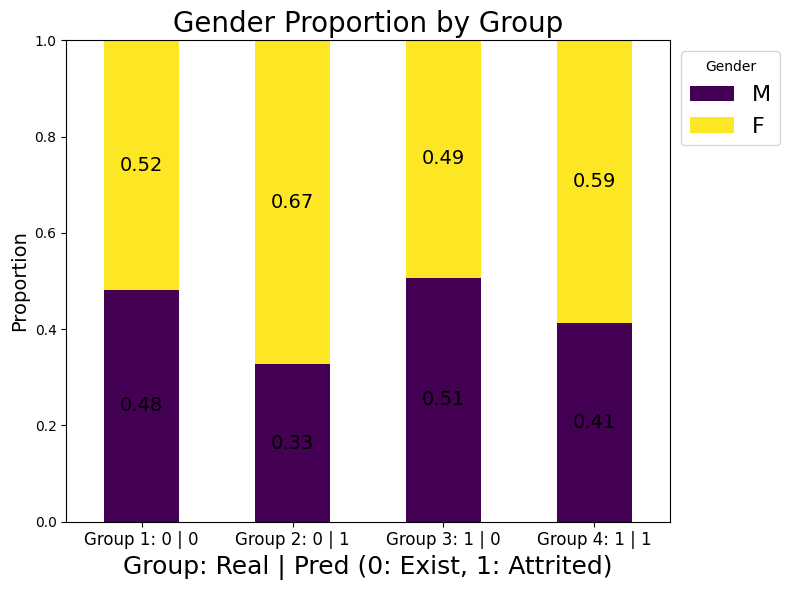

In [ ]:
for col in importance_ctgr:
    order = order_dict[col]

    # Initialize a DataFrame to store the proportional results
    result = pd.DataFrame(index=group_names, columns=order)

    # Process each group
    for group, name in zip(groups, group_names):
        # Calculate the proportion of each category
        proportions = group[col].value_counts(normalize=True)
        # Assign the proportions to the respective group and category
        for status in order:
            result.loc[name, status] = proportions.get(status, 0)  # Use 0 if the category is missing

    # Convert the results to numeric and plot
    result = result.astype(float)  # Ensure all data is float for plotting
    fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size
    result.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

    # Adding annotations inside the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:  # Only annotate if height is greater than 0
            ax.text(x + width / 2,
                    y + height / 2,
                    f"{height:.2f}",
                    ha='center',
                    va='center',
                    fontsize=14,
                    color='black')

    # Title and labels
    plt.title(f'{col} Proportion by Group', fontsize=20)
    plt.xlabel('Group: Real | Pred (0: Exist, 1: Attrited)', fontsize=18)
    plt.ylabel('Proportion', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.legend(title=col, bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=16)
    plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1
    plt.tight_layout()  # Adjust layout to fit all elements within the figure
    plt.show()

legend line change

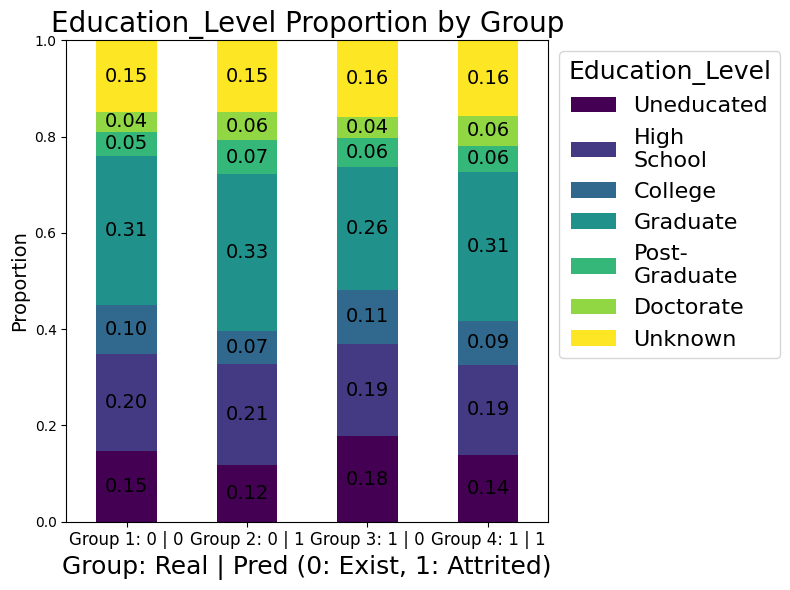

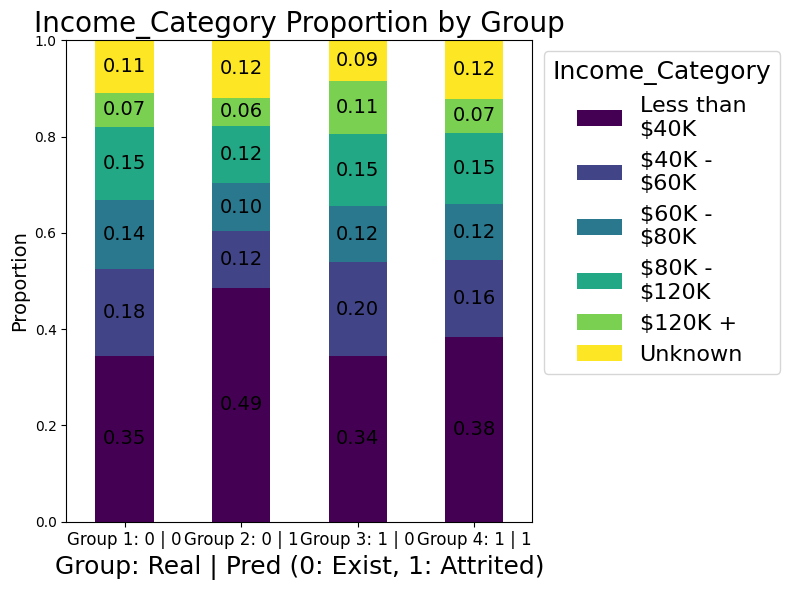

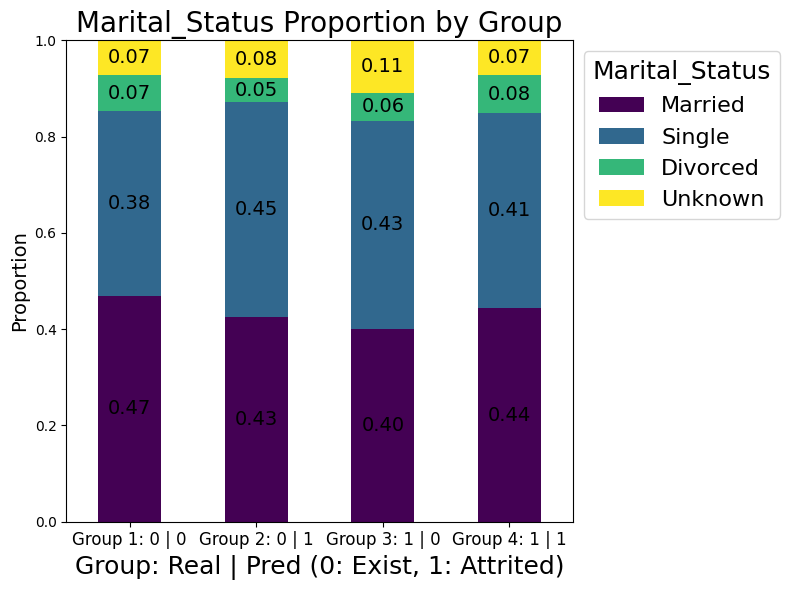

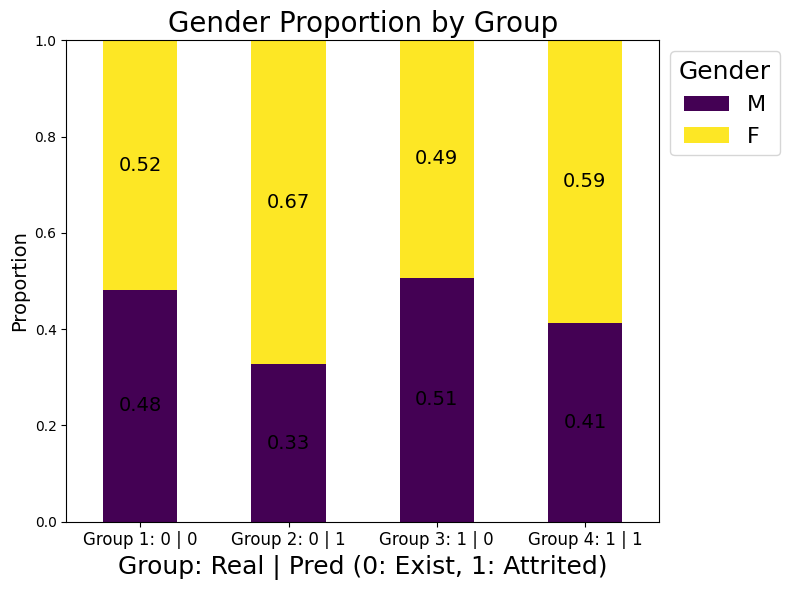

In [ ]:
import textwrap

# Function to wrap legend text
def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]

for col in importance_ctgr:
    order = order_dict[col]

    # Initialize a DataFrame to store the proportional results
    result = pd.DataFrame(index=group_names, columns=order)

    # Process each group
    for group, name in zip(groups, group_names):
        # Calculate the proportion of each category
        proportions = group[col].value_counts(normalize=True)
        # Assign the proportions to the respective group and category
        for status in order:
            result.loc[name, status] = proportions.get(status, 0)  # Use 0 if the category is missing

    # Convert the results to numeric and plot
    result = result.astype(float)  # Ensure all data is float for plotting
    fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size
    result.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

    # Adding annotations inside the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:  # Only annotate if height is greater than 0
            ax.text(x + width / 2,
                    y + height / 2,
                    f"{height:.2f}",
                    ha='center',
                    va='center',
                    fontsize=14,
                    color='black')

    # Wrapping legend labels
    handles, labels = ax.get_legend_handles_labels()
    labels = wrap_labels(labels, 10)  # Adjust the width as needed
    ax.legend(handles, labels, title=col, bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=16, title_fontsize=18)

    # Title and labels
    plt.title(f'{col} Proportion by Group', fontsize=20)
    plt.xlabel('Group: Real | Pred (0: Exist, 1: Attrited)', fontsize=18)
    plt.ylabel('Proportion', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1
    plt.tight_layout()  # Adjust layout to fit all elements within the figure
    plt.show()

label color change

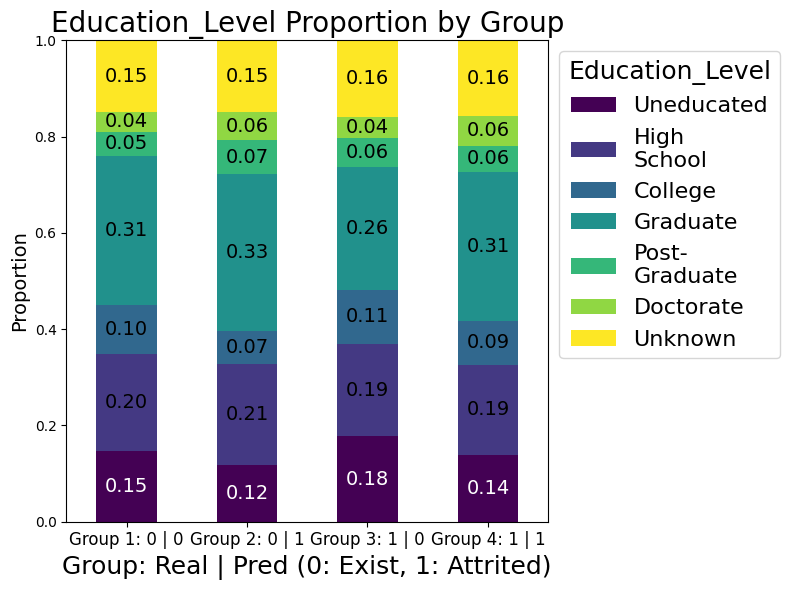

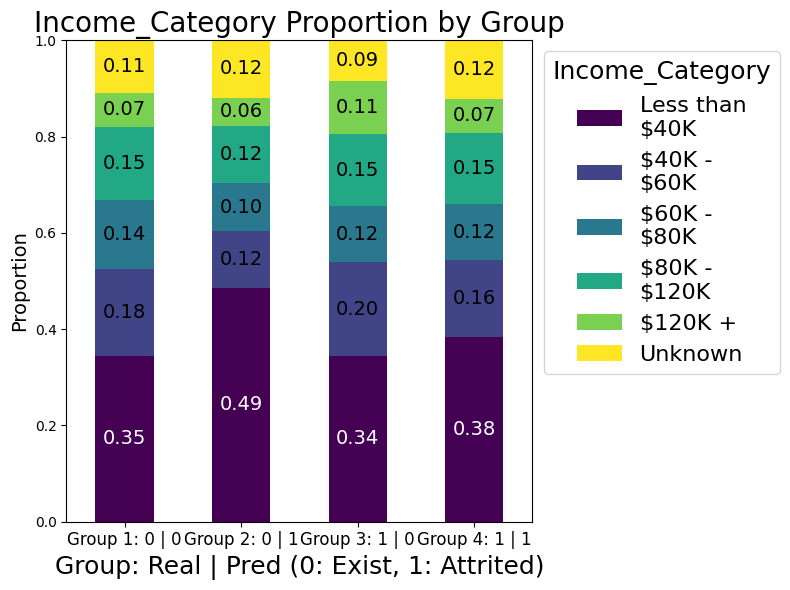

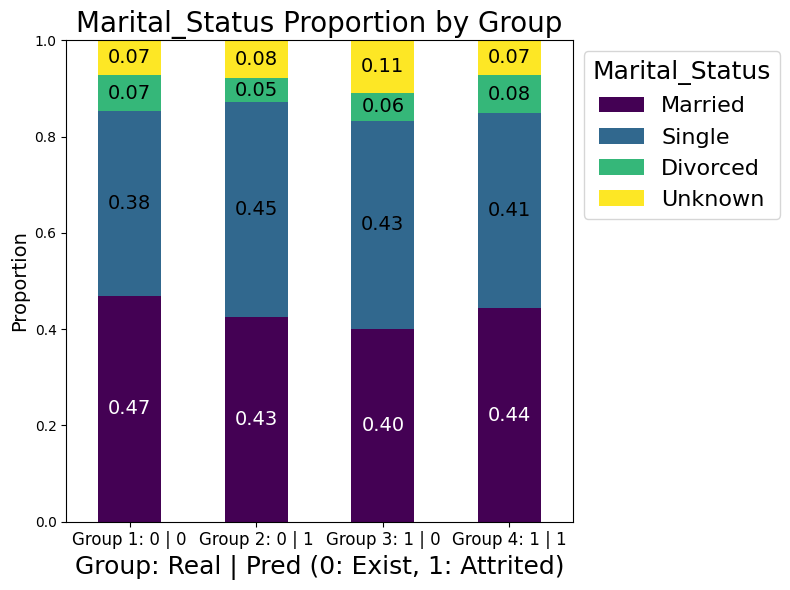

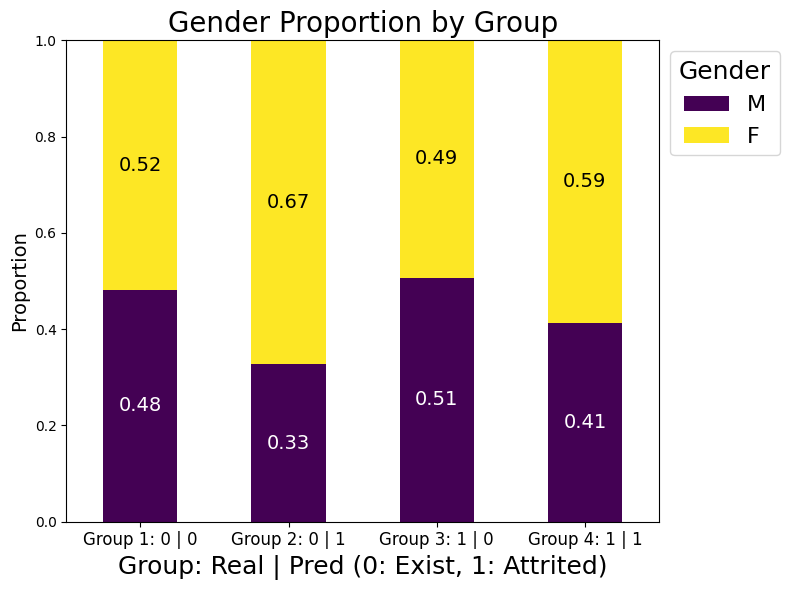

In [ ]:
from matplotlib.colors import to_hex

# Function to wrap legend text
def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]

# Extract purple from the Viridis colormap
viridis = plt.get_cmap('viridis')
purple_color = to_hex(viridis(0.0))

for col in importance_ctgr:
    order = order_dict[col]

    # Initialize a DataFrame to store the proportional results
    result = pd.DataFrame(index=group_names, columns=order)

    # Process each group
    for group, name in zip(groups, group_names):
        # Calculate the proportion of each category
        proportions = group[col].value_counts(normalize=True)
        # Assign the proportions to the respective group and category
        for status in order:
            result.loc[name, status] = proportions.get(status, 0)  # Use 0 if the category is missing

    # Convert the results to numeric and plot
    result = result.astype(float)  # Ensure all data is float for plotting
    fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size
    result.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

    # Adding annotations inside the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        # patch 색상 확인
        facecolor = to_hex(p.get_facecolor())
        if height > 0:  # Only annotate if height is greater than 0
            # Change text color to white for purple bars
            text_color = 'white' if facecolor == purple_color else 'black'
            ax.text(x + width / 2,
                    y + height / 2,
                    f"{height:.2f}",
                    ha='center',
                    va='center',
                    fontsize=14,
                    color=text_color)

    # Wrapping legend labels
    handles, labels = ax.get_legend_handles_labels()
    labels = wrap_labels(labels, 10)  # Adjust the width as needed
    ax.legend(handles, labels, title=col, bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=16, title_fontsize=18)

    # Title and labels
    plt.title(f'{col} Proportion by Group', fontsize=20)
    plt.xlabel('Group: Real | Pred (0: Exist, 1: Attrited)', fontsize=18)
    plt.ylabel('Proportion', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1
    plt.tight_layout()  # Adjust layout to fit all elements within the figure
    plt.show()

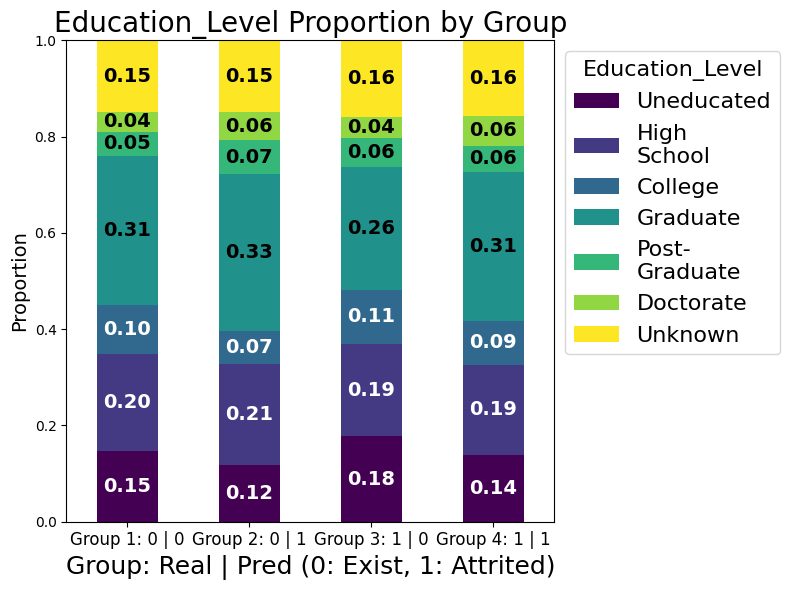

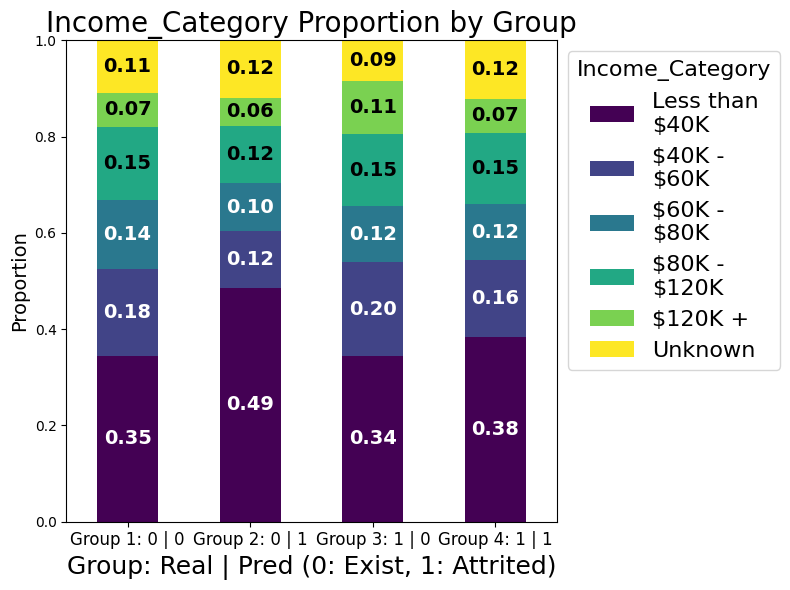

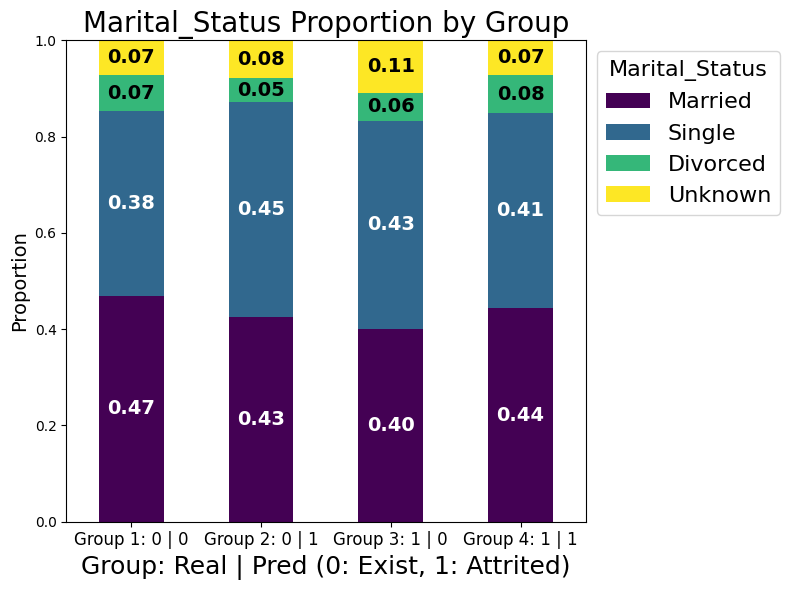

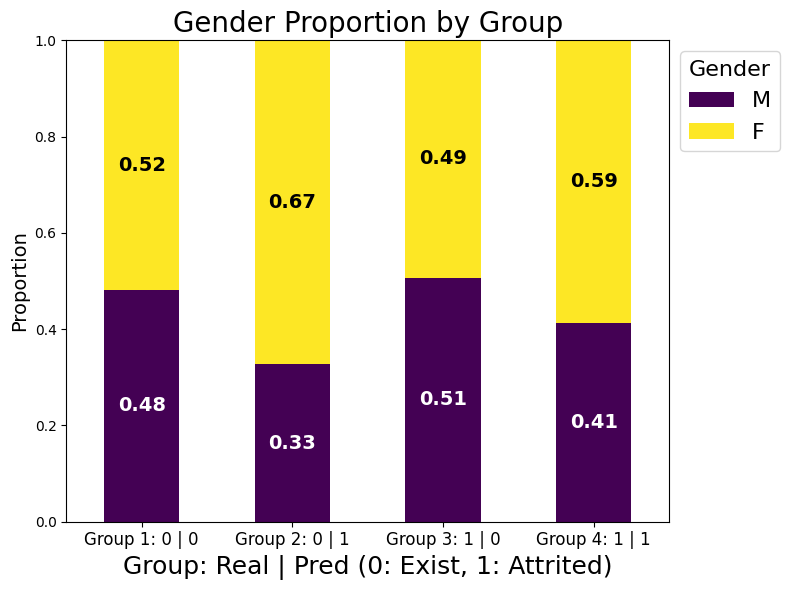

In [ ]:
viridis = plt.get_cmap('viridis')
dark_colors = [to_hex(viridis(i / 256)) for i in range(0, 128)]
for col in importance_ctgr:
    order = order_dict[col]

    # Initialize a DataFrame to store the proportional results
    result = pd.DataFrame(index=group_names, columns=order)

    # Process each group
    for group, name in zip(groups, group_names):
        # Calculate the proportion of each category
        proportions = group[col].value_counts(normalize=True)
        # Assign the proportions to the respective group and category
        for status in order:
            result.loc[name, status] = proportions.get(status, 0)  # Use 0 if the category is missing

    # Convert the results to numeric and plot
    result = result.astype(float)  # Ensure all data is float for plotting
    fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size
    result.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

    # Adding annotations inside the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        # patch color
        facecolor = to_hex(p.get_facecolor())
        if height > 0:  # Only annotate if height is greater than 0
            # Change text color to white for the darkest colors
            text_color = 'white' if facecolor in dark_colors else 'black'
            ax.text(x + width / 2,
                    y + height / 2,
                    f"{height:.2f}",
                    ha='center',
                    va='center',
                    fontsize=14,
                    color=text_color,
                    fontweight='bold')

    # Wrapping legend labels
    handles, labels = ax.get_legend_handles_labels()
    labels = wrap_labels(labels, 10)  # Adjust the width as needed
    ax.legend(handles, labels, title=col, bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=16, title_fontsize=16)

    # Title and labels
    plt.title(f'{col} Proportion by Group', fontsize=20)
    plt.xlabel('Group: Real | Pred (0: Exist, 1: Attrited)', fontsize=18)
    plt.ylabel('Proportion', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1
    plt.tight_layout()  # Adjust layout to fit all elements within the figure
    plt.show()

legend order change

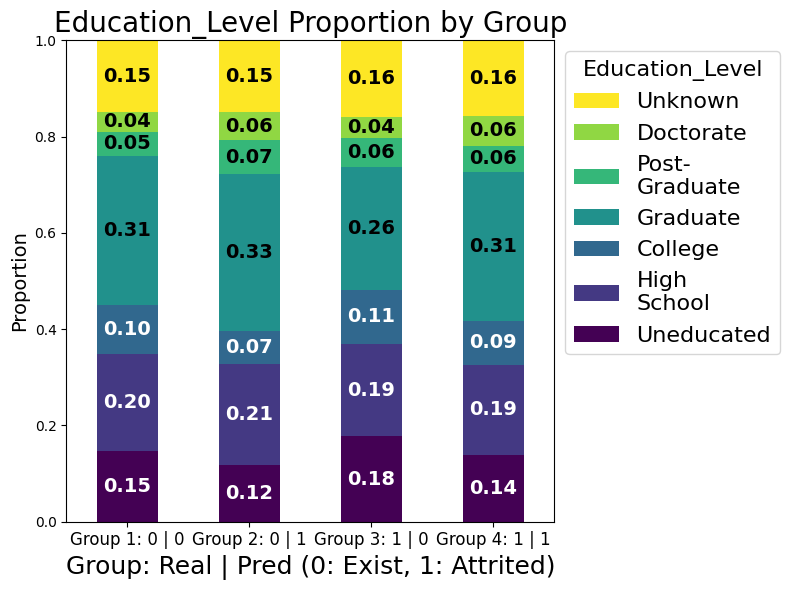

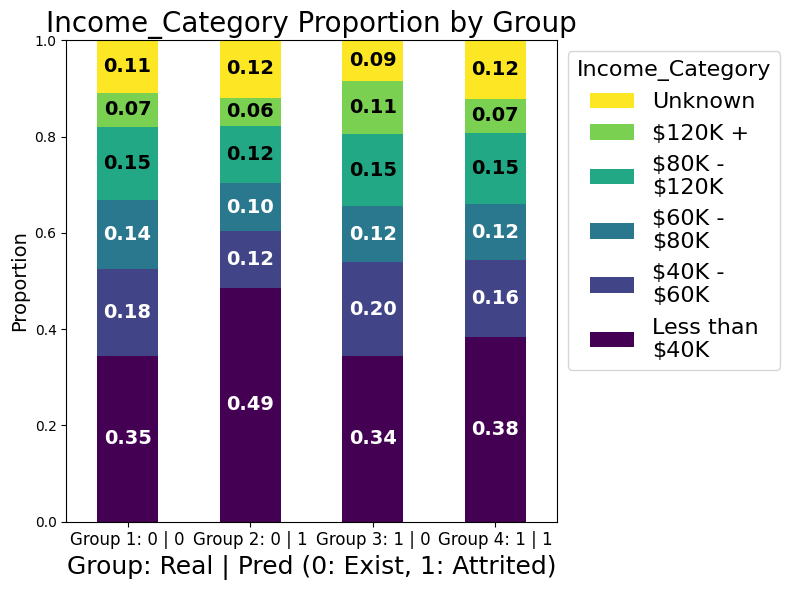

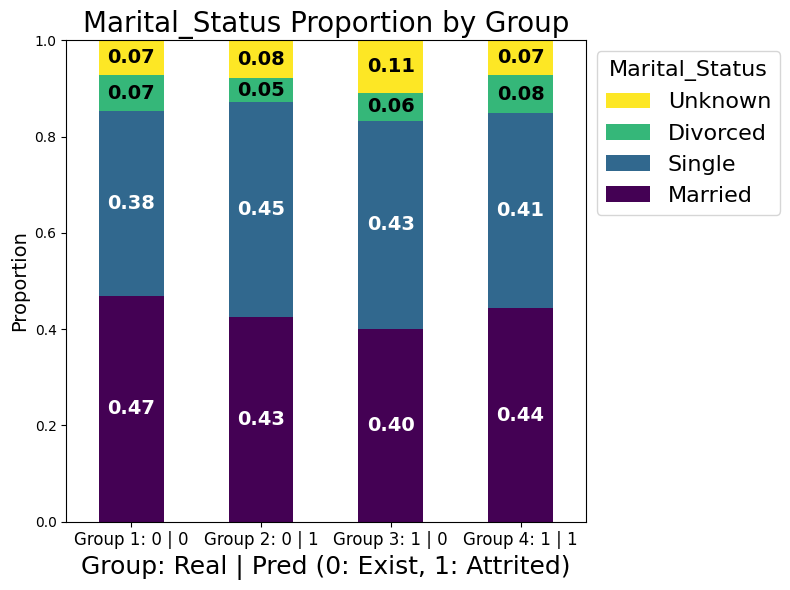

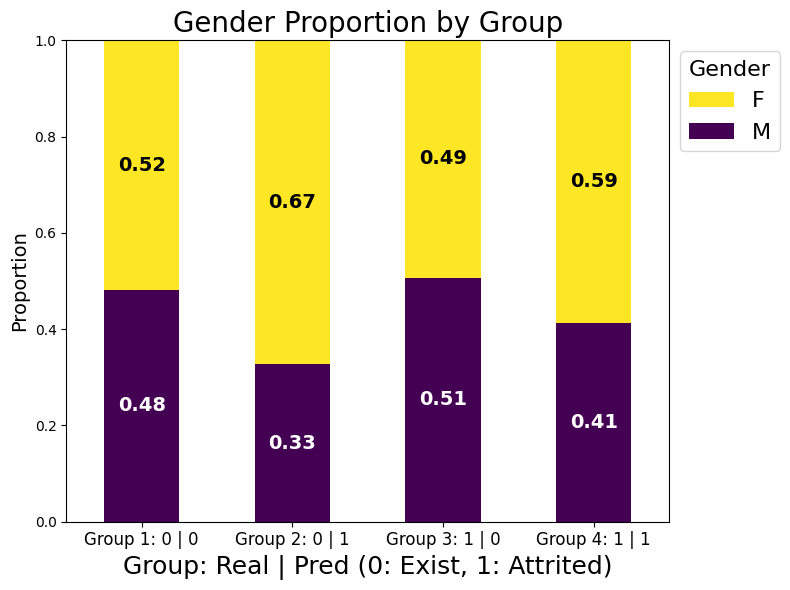

In [ ]:
# Function to wrap legend text
def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]

# Viridis colormap
viridis = plt.get_cmap('viridis')
dark_colors = [to_hex(viridis(i / 256)) for i in range(0, 128)]

for col in importance_ctgr:
    order = order_dict[col]

    # Initialize a DataFrame to store the proportional results
    result = pd.DataFrame(index=group_names, columns=order)

    # Process each group
    for group, name in zip(groups, group_names):
        # Calculate the proportion of each category
        proportions = group[col].value_counts(normalize=True)
        # Assign the proportions to the respective group and category
        for status in order:
            result.loc[name, status] = proportions.get(status, 0)  # Use 0 if the category is missing

    # Convert the results to numeric and plot
    result = result.astype(float)  # Ensure all data is float for plotting
    fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size
    result.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

    # Adding annotations inside the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        # patch color
        facecolor = to_hex(p.get_facecolor())
        if height > 0:  # Only annotate if height is greater than 0
            # Change text color to white for the darkest colors
            text_color = 'white' if facecolor in dark_colors else 'black'
            ax.text(x + width / 2,
                    y + height / 2,
                    f"{height:.2f}",
                    ha='center',
                    va='center',
                    fontsize=14,
                    color=text_color,
                    fontweight='bold')

    # Wrapping legend labels
    handles, labels = ax.get_legend_handles_labels()
    labels = wrap_labels(labels, 10)  # Adjust the width as needed
    # Reverse the order so that the legend matches the stacking order in the graph.
    handles = handles[::-1]
    labels = labels[::-1]
    ax.legend(handles, labels, title=col, bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=16, title_fontsize=16)

    # Title and labels
    plt.title(f'{col} Proportion by Group', fontsize=20)
    plt.xlabel('Group: Real | Pred (0: Exist, 1: Attrited)', fontsize=18)
    plt.ylabel('Proportion', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1
    plt.tight_layout()  # Adjust layout to fit all elements within the figure
    plt.show()

####Other Variables

In [ ]:
other_num = [
            'Months_on_book',
            'Months_Inactive_12_mon',
            'Contacts_Count_12_mon',
            'Total_Revolving_Bal',
            'Avg_Open_To_Buy',
            'Total_Amt_Chng_Q4_Q1',
            'Total_Trans_Amt',
            'Total_Trans_Ct',
            'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio'
            ]

In [ ]:
other_ctgr = ['Card_Category']

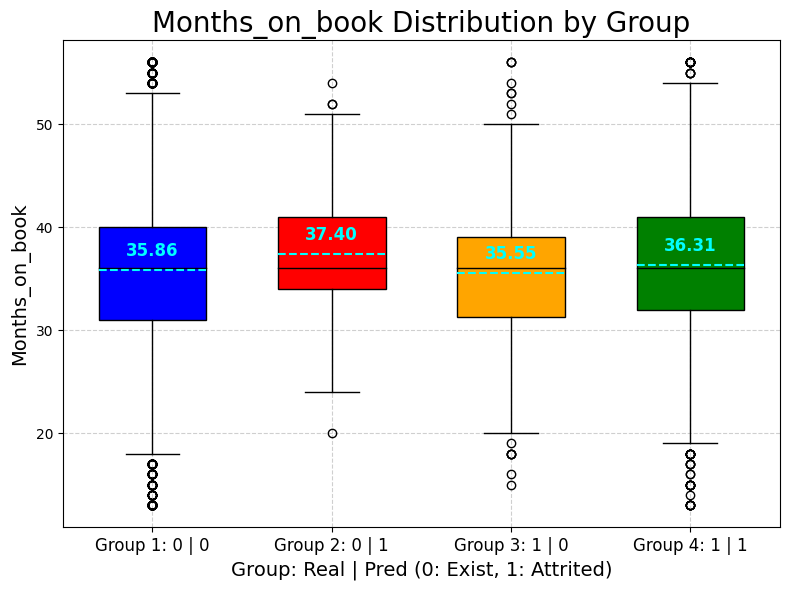

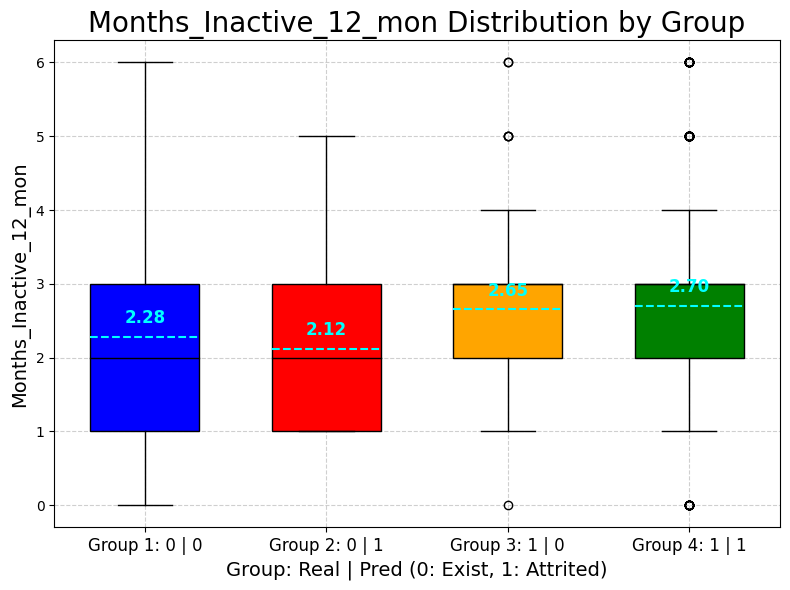

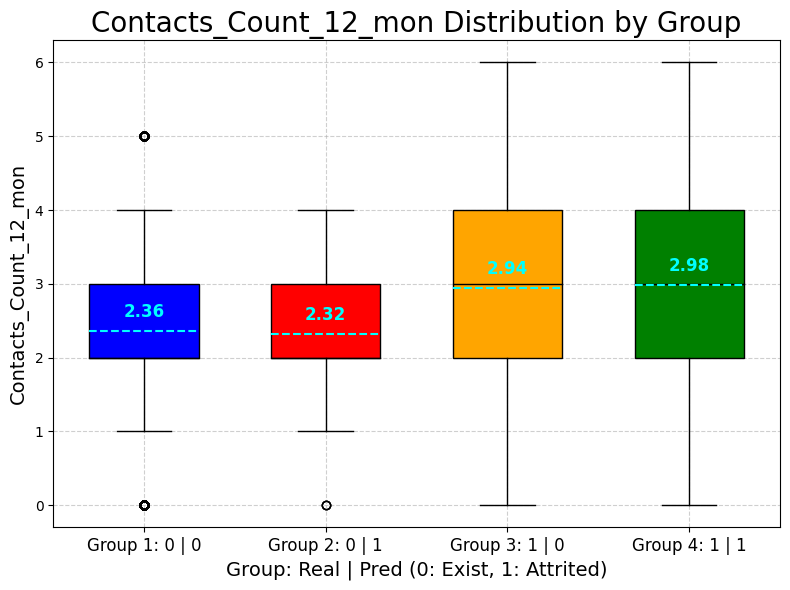

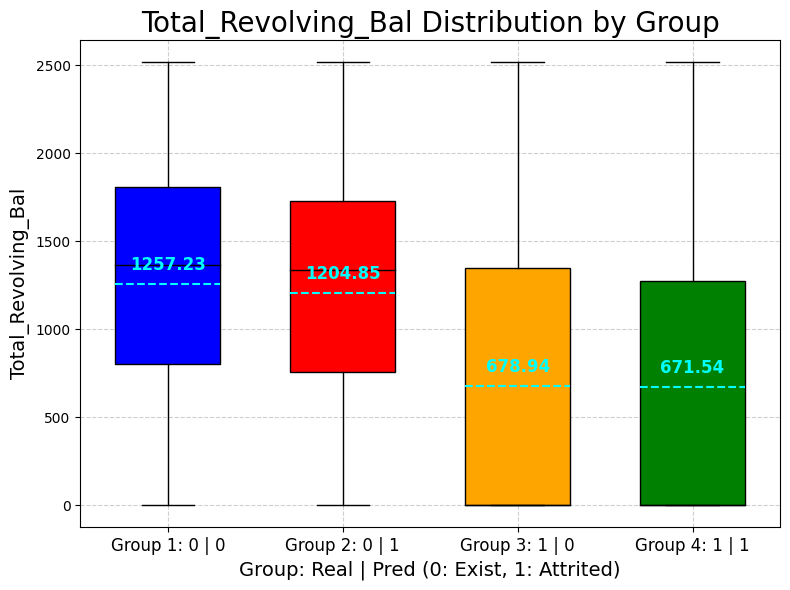

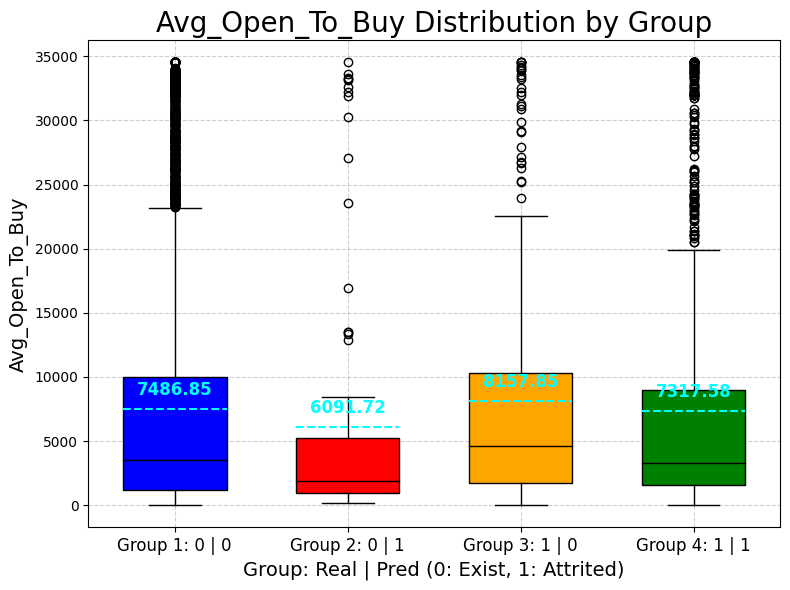

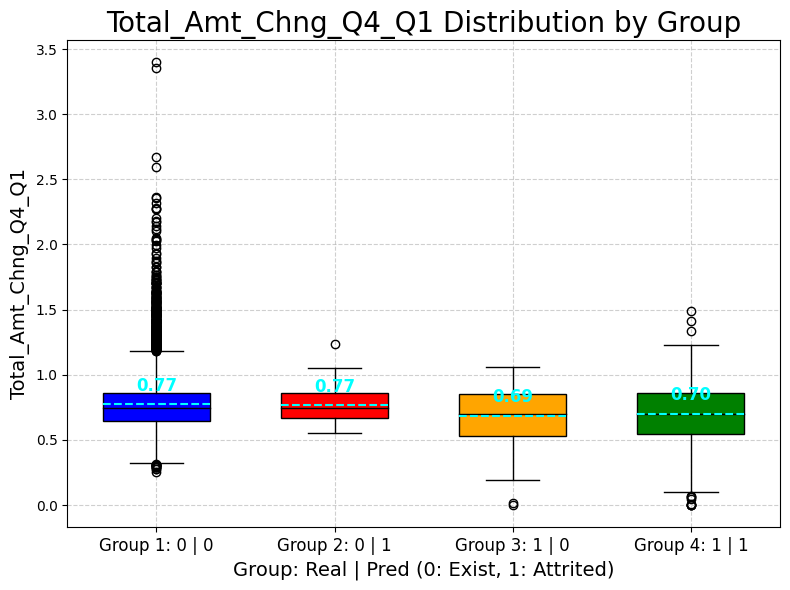

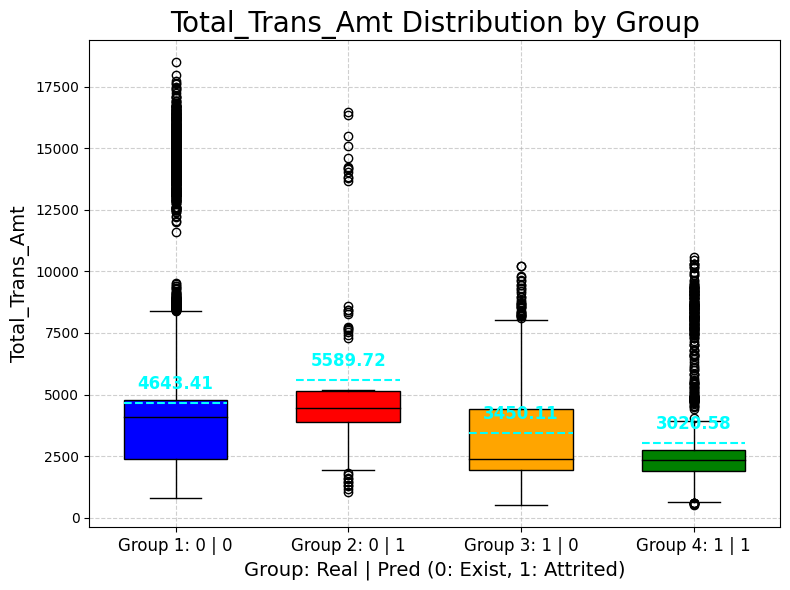

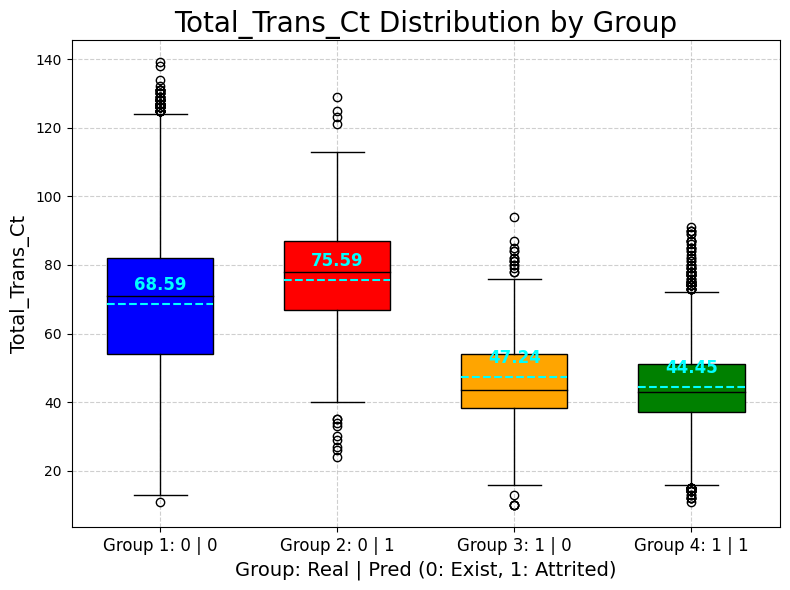

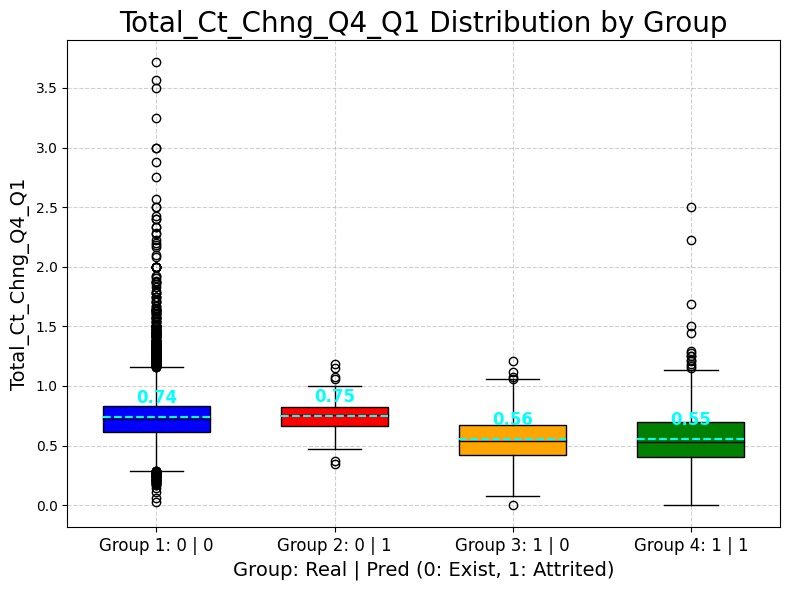

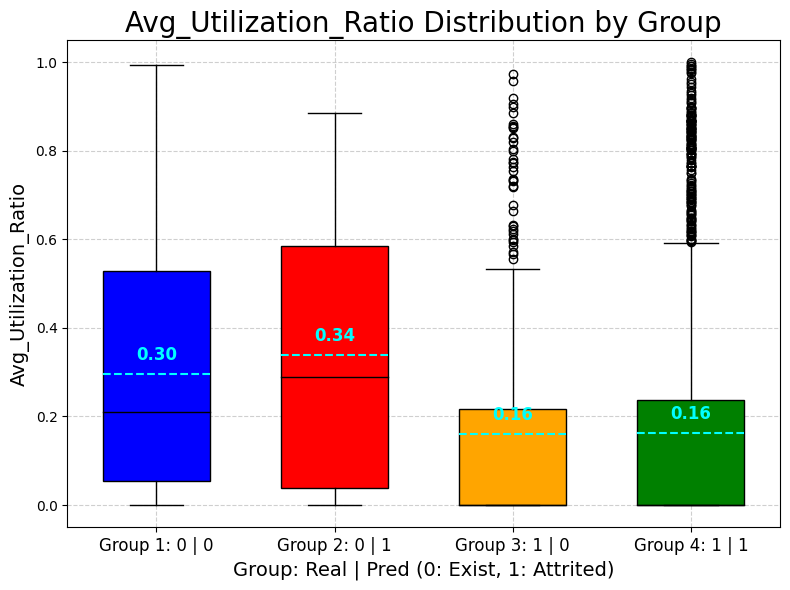

In [ ]:
for col in other_num:
    data = [group[col].dropna() for group in groups]

    # Create a figure and an axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a boxplot
    bp = ax.boxplot(data, patch_artist=True,showmeans=True, meanline=True,meanprops={'color': 'cyan', 'linestyle': '--', 'linewidth': 1.5},positions=range(1, len(groups) + 1), widths=0.6)  # Adjust positions and widths for better visualization

    # Color each box
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Customize the colors of the whiskers, fliers, caps, and medians
    for element in ['whiskers', 'fliers', 'caps', 'medians']:
        plt.setp(bp[element], color='black')  # Set all to black or choose colors accordingly

    # Set x-tick labels
    ax.set_xticks(range(1, len(groups) + 1))
    ax.set_xticklabels(group_names, fontsize=12)

    # Add labels and title
    ax.set_title(f'{col} Distribution by Group', fontsize=20)
    ax.set_xlabel('Group: Real | Pred (0: Exist, 1: Attrited)', fontsize=14)
    ax.set_ylabel(f'{col}', fontsize=14)

    # Optionally add a grid for better readability
    ax.grid(True, linestyle='--', alpha=0.6)

    # Add mean annotations
    for i in range(len(groups)):
        mean_val = data[i].mean()
        ax.annotate(f'{mean_val:.2f}', xy=(i + 1, mean_val), xytext=(0, 10),
                    textcoords='offset points', ha='center', fontsize=12, color='cyan', fontweight='bold')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
card_category_order = ['Blue', 'Silver', 'Gold', 'Platinum']

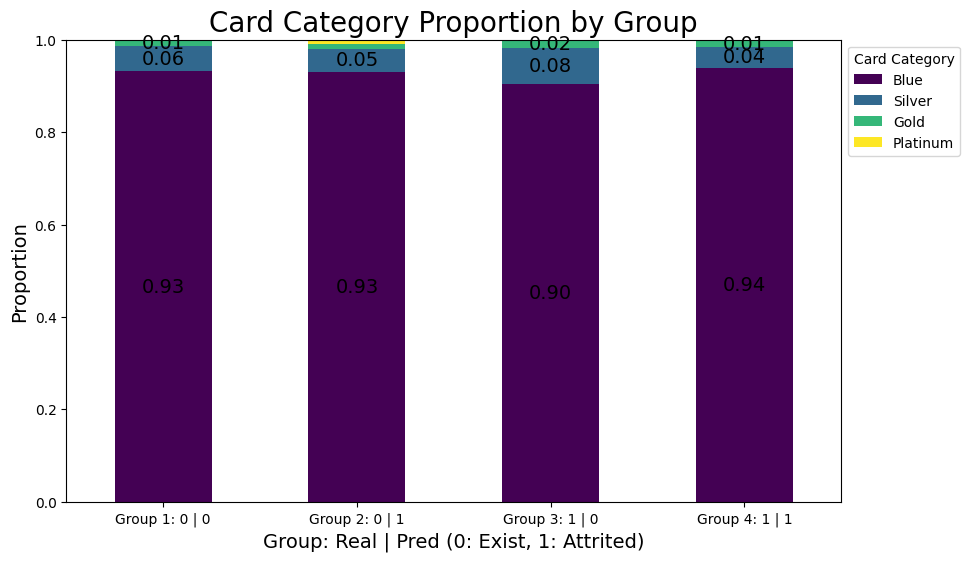

In [ ]:
# Initialize a DataFrame to store the proportional results
result = pd.DataFrame(index=group_names, columns=card_category_order)

# Process each group
for group, name in zip(groups, group_names):
    proportions = group['Card_Category'].value_counts(normalize=True)
    for status in card_category_order:
        result.loc[name, status] = proportions.get(status, 0)  # Use 0 if the category is missing

# Convert the results to numeric and plot
result = result.astype(float)  # Ensure all data is float for plotting
ax = result.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Adding annotations inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height>0.01:
        ax.text(x + width/2,
                y + height/2,
                f"{height:.2f}",
                ha='center',
                va='center',
                fontsize=14,
                color='black')

# Title and labels
plt.title('Card Category Proportion by Group', fontsize=20)
plt.xlabel('Group: Real | Pred (0: Exist, 1: Attrited)', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Card Category', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1
plt.show()

####Key Variables (violin)

<ipython-input-205-1820153ad2f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1.5, bw=0.2)
<ipython-input-205-1820153ad2f9>:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1.5, bw=0.2)
<ipython-input-205-1820153ad2f9>:12: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1

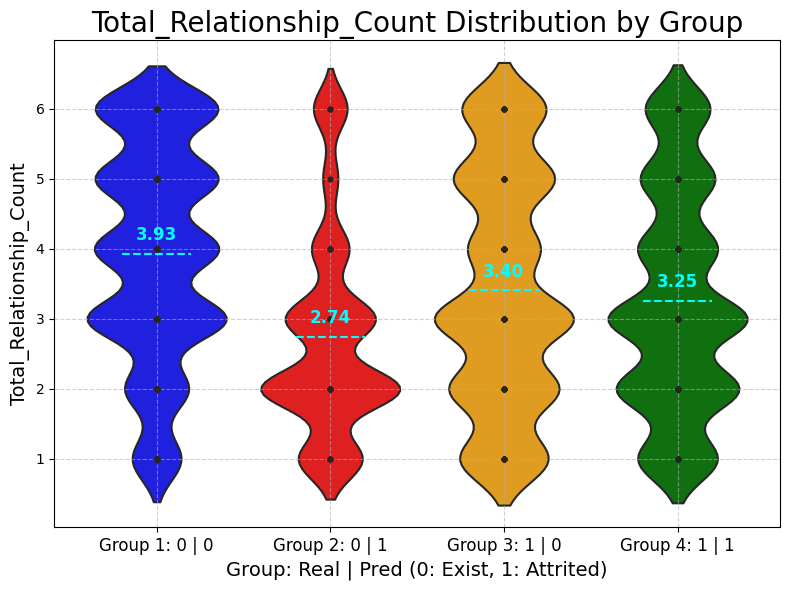

<ipython-input-205-1820153ad2f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1.5, bw=0.2)
<ipython-input-205-1820153ad2f9>:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1.5, bw=0.2)
<ipython-input-205-1820153ad2f9>:12: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1

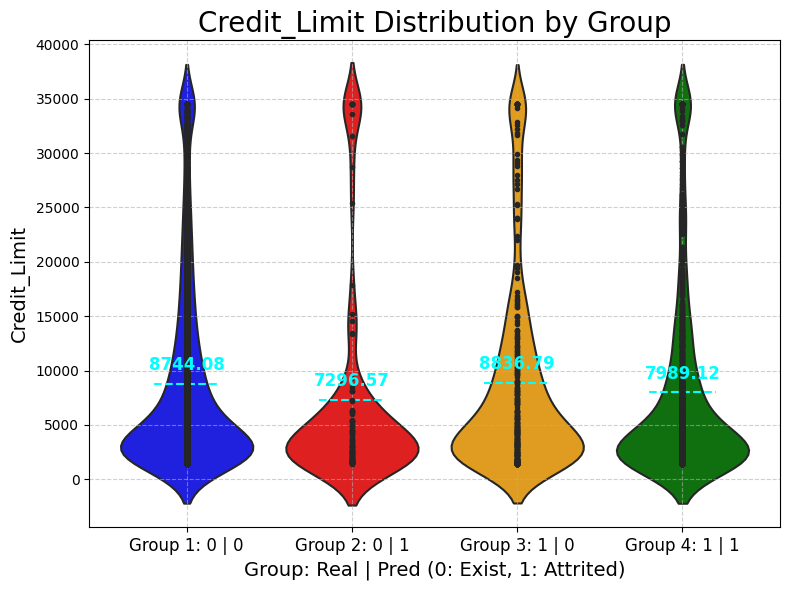

<ipython-input-205-1820153ad2f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1.5, bw=0.2)
<ipython-input-205-1820153ad2f9>:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1.5, bw=0.2)
<ipython-input-205-1820153ad2f9>:12: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1

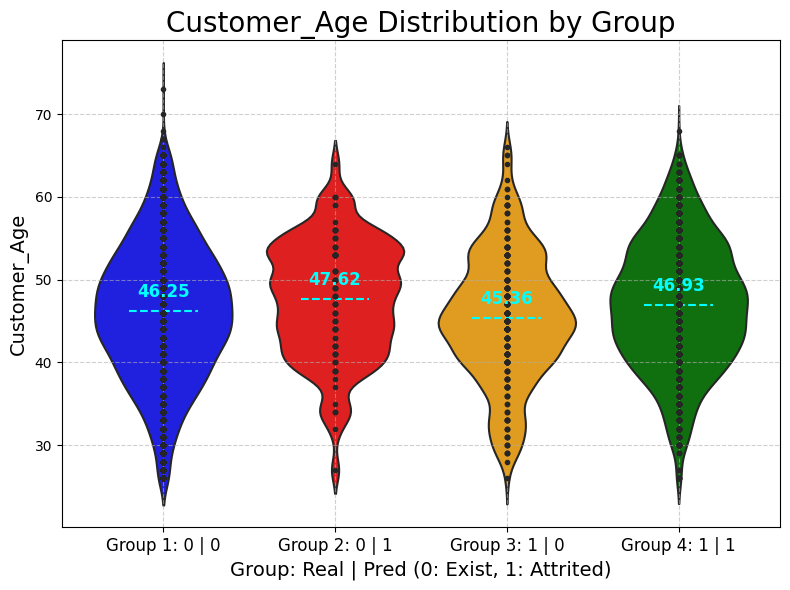

<ipython-input-205-1820153ad2f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1.5, bw=0.2)
<ipython-input-205-1820153ad2f9>:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1.5, bw=0.2)
<ipython-input-205-1820153ad2f9>:12: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1

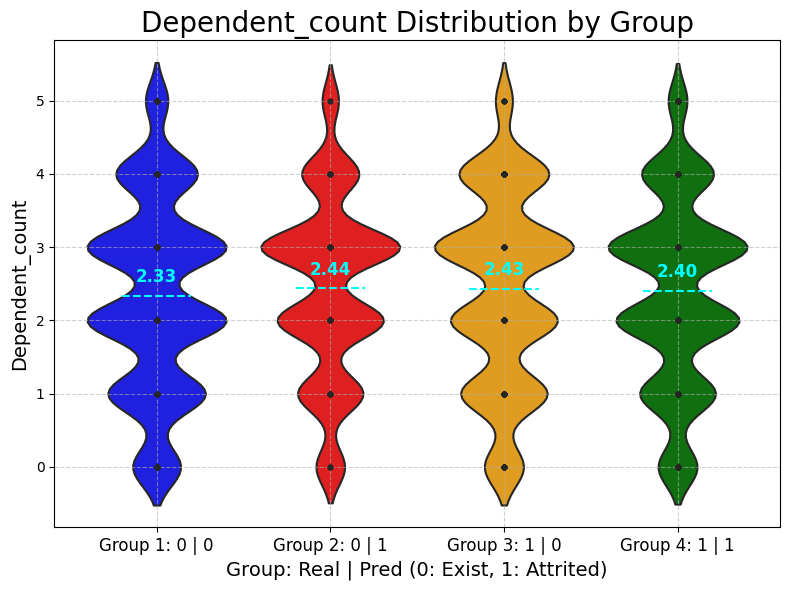

In [ ]:
for col in importance_num:
    all_data = pd.concat([group[col].dropna().reset_index(drop=True) for group in groups], axis=1)
    all_data.columns = group_names
    all_data = all_data.melt(var_name='Group', value_name=col)

    # Create a figure and an axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a violin plot
    sns.violinplot(x='Group', y=col, data=all_data, palette=colors, inner="point", scale="width", linewidth=1.5, bw=0.2)

    # Add mean lines
    for i, group_name in enumerate(group_names):
        mean_val = all_data[all_data['Group'] == group_name][col].mean()
        ax.plot([i - 0.2, i + 0.2], [mean_val, mean_val], color='cyan', linestyle='--', linewidth=1.5)
        ax.annotate(f'{mean_val:.2f}', xy=(i, mean_val), xytext=(0, 10),
                    textcoords='offset points', ha='center', fontsize=12, color='cyan', fontweight='bold')

    # Set x-tick labels
    ax.set_xticks(range(len(groups)))
    ax.set_xticklabels(group_names, fontsize=12)

    # Add labels and title
    ax.set_title(f'{col} Distribution by Group', fontsize=20)
    ax.set_xlabel('Group: Real | Pred (0: Exist, 1: Attrited)', fontsize=14)
    ax.set_ylabel(f'{col}', fontsize=14)

    # Optionally add a grid for better readability
    ax.grid(True, linestyle='--', alpha=0.6)

    # Show the plot
    plt.tight_layout()
    plt.show()

###proportion of attrited vs. existing customers

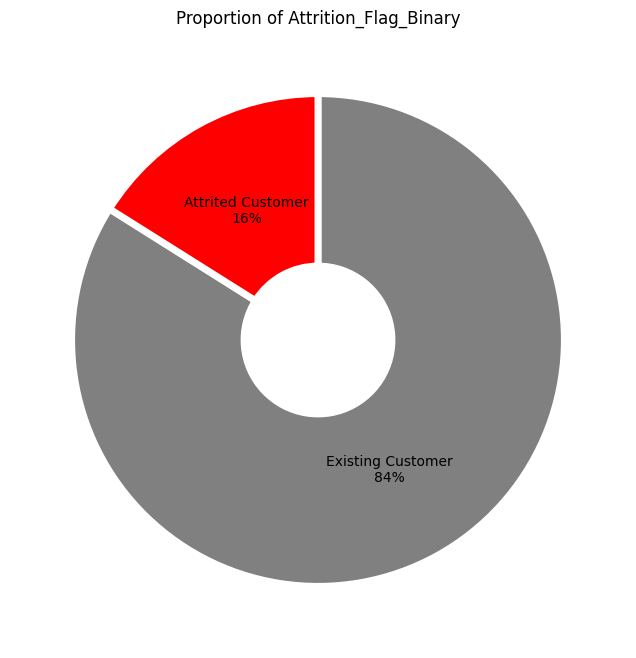

In [ ]:
# Calculate the proportion of Attrition_Flag_Binary
attrition_flag_counts = df['Attrition_Flag_Binary'].value_counts()
attrition_flag_labels = ['Existing Customer', 'Attrited Customer']

wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# Define a function to display both labels and percentages
def func(pct, allvalues, labels):
    absolute = int(pct / 100. * sum(allvalues))
    index = list(allvalues).index(absolute)
    return f"{labels[index]}\n{pct:.0f}%"

plt.figure(figsize=(8, 8))
plt.pie(attrition_flag_counts, autopct=lambda pct: func(pct, attrition_flag_counts, attrition_flag_labels), startangle=90, counterclock=False, colors=['gray', 'red'], wedgeprops=wedgeprops)
plt.title('Proportion of Attrition_Flag_Binary')
plt.show()

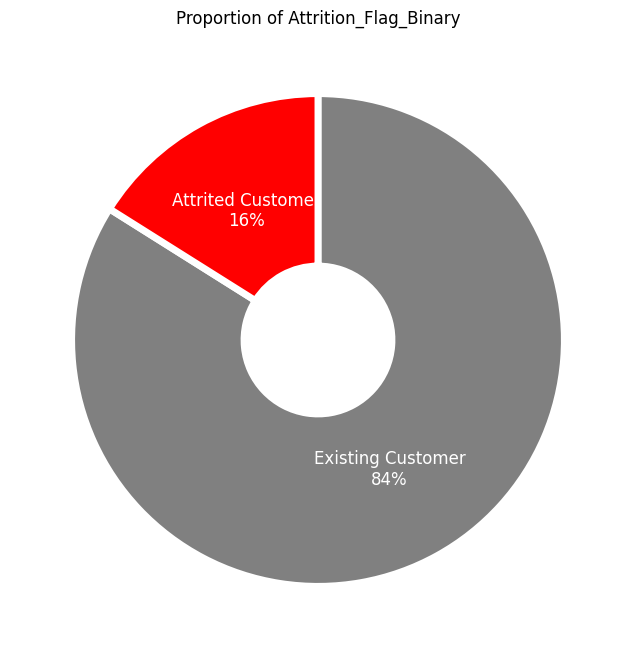

In [ ]:
# Calculate the proportion of Attrition_Flag_Binary
attrition_flag_counts = df['Attrition_Flag_Binary'].value_counts()
attrition_flag_labels = ['Existing Customer', 'Attrited Customer']

wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# Define a function to display both labels and percentages
def func(pct, allvalues, labels):
    absolute = int(pct / 100. * sum(allvalues))
    return f"{labels[allvalues.index(absolute)]}\n{pct:.0f}%"

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(attrition_flag_counts, autopct=lambda pct: func(pct, attrition_flag_counts.tolist(), attrition_flag_labels), startangle=90, counterclock=False, colors=['gray', 'red'], wedgeprops=wedgeprops)

# Change lable color
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

plt.title('Proportion of Attrition_Flag_Binary')
plt.show()

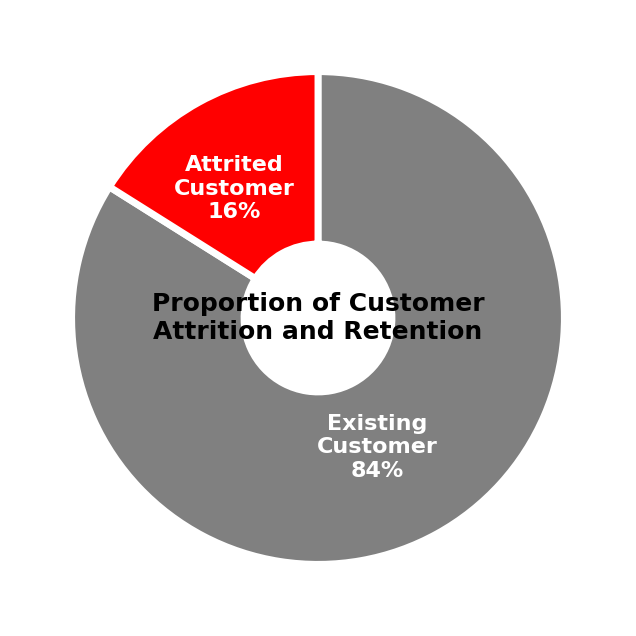

In [ ]:
# Calculate the proportion of Attrition_Flag_Binary
attrition_flag_counts = df['Attrition_Flag_Binary'].value_counts()
attrition_flag_labels = ['Existing\nCustomer', 'Attrited\nCustomer']

wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# Define a function to display both labels and percentages
def func(pct, allvalues, labels):
    absolute = int(pct / 100. * sum(allvalues))
    return f"{labels[allvalues.index(absolute)]}\n{pct:.0f}%"

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(attrition_flag_counts, autopct=lambda pct: func(pct, attrition_flag_counts.tolist(), attrition_flag_labels), startangle=90, counterclock=False, colors=['gray', 'red'], wedgeprops=wedgeprops)

# Change lable color
for i, autotext in enumerate(autotexts):
    autotext.set_color('white')
    autotext.set_fontsize(16)
    autotext.set_weight('bold')
    # Adjust text position
    x, y = autotext.get_position()
    autotext.set_position((x - 0.05, y))

 # Center the title within the pie chart
plt.text(0, 0, 'Proportion of Customer\nAttrition and Retention', horizontalalignment='center', verticalalignment='center', fontsize=18, fontweight='bold')

plt.show()